# WORLD HAPPINESS


## Bussiness Understanding 

The World Happiness Report is a landmark survey of the state of global happiness. The first report published in 2012. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

---

The dataset used for Challenge 2 are from World Happiness Report from 2017 to 2020. The datasets give the happiness rank and happiness score from 155, 157 and 154 countries all arpund the world based on year 2017, 2018-2019, 2020 respectively.  The happiness score is based on six factors including; family, life expectansy, economy, generosity, trust in government and freedom. 

---

The purpose of choosing this work is to find out which factors are more important to live a happier life. As a result, people and countries can focus on the more significant factors to achieve a higher happiness level. We also will implement several machine learning algorithms to predict the happiness score and compare the result to discover which algorithm works better for this specific dataset.


---


The purposes from doing world happiness analysis is to find which factor give high contribution to happiness score so that people and countries can focus to improve the more contributed factor in order to achieve higher happiness score. 

---

This notebook will include the pre-processing data, Modeling and Evaluation from World Happiness dataset. 

The dataset obtained from: 

1.   https://www.kaggle.com/unsdsn/world-happiness
2.   https://worldhappiness.report/ed/2017/
3.   https://worldhappiness.report/ed/2018/
4. https://worldhappiness.report/ed/2019/
5. https://worldhappiness.report/ed/2020/

## Pre-Processing 

### Showing Dataset

In [336]:
pip install pulp

In [337]:
import numpy as np
import pandas as pd
import io
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns
from pulp import *
from tabulate import tabulate
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import os
import plotly.figure_factory as ff
from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs

In [338]:
uploaded = files.upload()

Saving Data Challenge 2.xlsx to Data Challenge 2 (3).xlsx


In [339]:
df =  pd.ExcelFile(io.BytesIO(uploaded['Data Challenge 2.xlsx']))
df_2017 = pd.read_excel(df, '2017')
df_2018 = pd.read_excel(df, '2018')
df_2019 = pd.read_excel(df, '2019')
df_2020 = pd.read_excel(df, '2020')

In [340]:
df_2017.head()

,Country or region,Region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Norway,Western Europe,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964
1,Denmark,Western Europe,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770
2,Iceland,Western Europe,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527
3,Switzerland,Western Europe,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007
4,Finland,Western Europe,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612


In [341]:
df_2018.head()

,Country or region,Region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,Western Europe,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,Norway,Western Europe,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,Denmark,Western Europe,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,Iceland,Western Europe,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,Switzerland,Western Europe,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [342]:
df_2019.head()

,Country or region,Region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,Western Europe,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,Denmark,Western Europe,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,Norway,Western Europe,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,Iceland,Western Europe,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,Netherlands,Western Europe,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [343]:
df_2020.head()

,Country,Region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,Western Europe,7.8087,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857
1,Denmark,Western Europe,7.6456,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260
2,Switzerland,Western Europe,7.5599,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946
3,Iceland,Western Europe,7.5045,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541
4,Norway,Western Europe,7.4880,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101


### Check For Missing Value & Replacing Missing Value

#### 2017

In [344]:
df_2017.eq(0).sum()

Country or region               0
Region                          0
Score                           0
GDP per capita                  1
Social support                  1
Healthy life expectancy         1
Freedom to make life choices    1
Generosity                      1
Perceptions of corruption       1
dtype: int64

In [345]:
df_2017.dtypes

Country or region                object
Region                           object
Score                           float64
GDP per capita                  float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
dtype: object

In [346]:
rata_GDP7=df_2017['GDP per capita'].astype('float').mean(axis=0)
print("Rerata GDP per capita 2017:", rata_GDP7)

Rerata GDP per capita 2017: 0.9847182019463474


In [347]:
df_2017["GDP per capita"].replace(np.nan, rata_GDP7, inplace=True)

In [348]:
rata_social7=df_2017['Social support'].astype('float').mean(axis=0)
print("Rerata Social support 2017:", rata_social7)

Rerata Social support 2017: 1.1888977504545641


In [349]:
df_2017["Social support"].replace(np.nan, rata_social7, inplace=True)

In [350]:
rata_healthy7=df_2017['Healthy life expectancy'].astype('float').mean(axis=0)
print("Rerata Healthy life expectancy 2017:", rata_healthy7)

Rerata Healthy life expectancy 2017: 0.5513407826123219


In [351]:
df_2017["Healthy life expectancy"].replace(np.nan, rata_healthy7, inplace=True)

In [352]:
rata_freedom7=df_2017['Freedom to make life choices'].astype('float').mean(axis=0)
print("Rerata Freedom to make life choices 2017:", rata_freedom7)

Rerata Freedom to make life choices 2017: 0.4087859728583886


In [353]:
df_2017["Freedom to make life choices"].replace(np.nan, rata_freedom7, inplace=True)

In [354]:
rata_perceptions7=df_2017['Perceptions of corruption'].astype('float').mean(axis=0)
print("Rerata Perceptions of corruption 2017:", rata_perceptions7)

Rerata Perceptions of corruption 2017: 0.12312022065142951


In [355]:
rata_generosity7=df_2017['Generosity'].astype('float').mean(axis=0)
print("Rerata Generosity 2017:", rata_generosity7)

Rerata Generosity 2017: 0.24688347161657387


In [356]:
df_2017["Generosity"].replace(np.nan, rata_generosity7, inplace=True)

In [357]:
df_2017["Perceptions of corruption"].replace(np.nan, rata_perceptions7, inplace=True)

#### 2018

In [358]:
df_2018.eq(0).sum()

Country or region               0
Region                          0
Score                           0
GDP per capita                  1
Social support                  1
Healthy life expectancy         1
Freedom to make life choices    1
Generosity                      1
Perceptions of corruption       2
dtype: int64

In [359]:
df_2018.dtypes

Country or region                object
Region                           object
Score                           float64
GDP per capita                  float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
dtype: object

In [360]:
rata_GDP=df_2018['GDP per capita'].astype('float').mean(axis=0)
print("Rerata GDP per capita:", rata_GDP)

Rerata GDP per capita: 0.8914487179487178


In [361]:
df_2018["GDP per capita"].replace(np.nan, rata_GDP, inplace=True)

In [362]:
rata_social=df_2018['Social support'].astype('float').mean(axis=0)
print("Rerata Social support:", rata_GDP)

Rerata Social support: 0.8914487179487178


In [363]:
df_2018["Social support"].replace(np.nan, rata_social, inplace=True)

In [364]:
rata_healthy=df_2018['Healthy life expectancy'].astype('float').mean(axis=0)
print("Rerata Healthy life expectancy:", rata_healthy)

Rerata Healthy life expectancy: 0.5973461538461537


In [365]:
df_2018["Healthy life expectancy"].replace(np.nan, rata_healthy, inplace=True)

In [366]:
rata_freedom=df_2018['Freedom to make life choices'].astype('float').mean(axis=0)
print("Rerata Freedom to make life choices:", rata_freedom)

Rerata Freedom to make life choices: 0.4545064102564102


In [367]:
df_2018["Freedom to make life choices"].replace(np.nan, rata_freedom, inplace=True)

In [368]:
rata_generosity=df_2018['Generosity'].astype('float').mean(axis=0)
print("Rerata Generosity:", rata_generosity)

Rerata Generosity: 0.1810064102564103


In [369]:
df_2018["Generosity"].replace(np.nan, rata_generosity, inplace=True)

In [370]:
rata_perceptions=df_2018['Perceptions of corruption'].astype('float').mean(axis=0)
print("Rerata Perceptions of corruption:", rata_perceptions)

Rerata Perceptions of corruption: 0.11200000000000002


In [371]:
df_2018["Perceptions of corruption"].replace(np.nan, rata_perceptions, inplace=True)

#### 2019

In [372]:
df_2019.eq(0).sum()

Country or region               0
Region                          0
Score                           0
GDP per capita                  1
Social support                  1
Healthy life expectancy         1
Freedom to make life choices    1
Generosity                      1
Perceptions of corruption       1
dtype: int64

In [373]:
df_2019.dtypes

Country or region                object
Region                           object
Score                           float64
GDP per capita                  float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
dtype: object

In [374]:
rata_GDP=df_2019['GDP per capita'].astype('float').mean(axis=0)
print("Rerata GDP per capita:", rata_GDP)

Rerata GDP per capita: 0.9051474358974363


In [375]:
df_2019["GDP per capita"].replace(np.nan, rata_GDP, inplace=True)

In [376]:
rata_social=df_2019['Social support'].astype('float').mean(axis=0)
print("Rerata Social support:", rata_GDP)

Rerata Social support: 0.9051474358974363


In [377]:
df_2019["Social support"].replace(np.nan, rata_social, inplace=True)

In [378]:
rata_healthy=df_2019['Healthy life expectancy'].astype('float').mean(axis=0)
print("Rerata Healthy life expectancy:", rata_healthy)

Rerata Healthy life expectancy: 0.7252435897435898


In [379]:
df_2019["Healthy life expectancy"].replace(np.nan, rata_healthy, inplace=True)

In [380]:
rata_freedom=df_2019['Freedom to make life choices'].astype('float').mean(axis=0)
print("Rerata Freedom to make life choices:", rata_freedom)

Rerata Freedom to make life choices: 0.3925705128205128


In [381]:
df_2019["Freedom to make life choices"].replace(np.nan, rata_freedom, inplace=True)

In [382]:
rata_generosity=df_2019['Generosity'].astype('float').mean(axis=0)
print("Rerata Generosity:", rata_generosity)

Rerata Generosity: 0.18484615384615383


In [383]:
df_2019["Generosity"].replace(np.nan, rata_generosity, inplace=True)

In [384]:
rata_perceptions=df_2019['Perceptions of corruption'].astype('float').mean(axis=0)
print("Rerata Perceptions of corruption:", rata_perceptions)

Rerata Perceptions of corruption: 0.11060256410256411


In [385]:
df_2019["Perceptions of corruption"].replace(np.nan, rata_perceptions, inplace=True)

#### 2020

In [386]:
df_2020.eq(0).sum()

Country                         0
Region                          0
Score                           0
GDP per capita                  1
Social support                  1
Healthy life expectancy         1
Freedom to make life choices    1
Generosity                      1
Perceptions of corruption       1
dtype: int64

In [387]:
rata_GDP=df_2020['GDP per capita'].astype('float').mean(axis=0)
print("Rerata GDP per capita:", rata_GDP)

Rerata GDP per capita: 0.8687711374870702


In [388]:
df_2020["GDP per capita"].replace(np.nan, rata_GDP, inplace=True)

In [389]:
rata_social=df_2020['Social support'].astype('float').mean(axis=0)
print("Rerata Social support:", rata_GDP)

Rerata Social support: 0.8687711374870702


In [390]:
df_2020["Social support"].replace(np.nan, rata_social, inplace=True)

In [391]:
rata_healthy=df_2020['Healthy life expectancy'].astype('float').mean(axis=0)
print("Rerata Healthy life expectancy:", rata_healthy)

Rerata Healthy life expectancy: 0.692869072207828


In [392]:
df_2020["Healthy life expectancy"].replace(np.nan, rata_healthy, inplace=True)

In [393]:
rata_freedom=df_2020['Freedom to make life choices'].astype('float').mean(axis=0)
print("Rerata Freedom to make life choices:", rata_freedom)

Rerata Freedom to make life choices: 0.4635830325336238


In [394]:
df_2020["Freedom to make life choices"].replace(np.nan, rata_freedom, inplace=True)

In [395]:
rata_generosity=df_2020['Generosity'].astype('float').mean(axis=0)
print("Rerata Generosity:", rata_generosity)

Rerata Generosity: 0.18937483729392873


In [396]:
df_2020["Generosity"].replace(np.nan, rata_generosity, inplace=True)

In [397]:
rata_perceptions=df_2020['Perceptions of corruption'].astype('float').mean(axis=0)
print("Rerata Perceptions of corruption:", rata_perceptions)

Rerata Perceptions of corruption: 0.13071751432094625


In [398]:
df_2020["Perceptions of corruption"].replace(np.nan, rata_perceptions, inplace=True)

### Visualisasi

Pada bagian ini dilakukan data visualisasi untuk melihat sebaran data happiness score setiap tahunnya pada masing-masing Region, melihat korelasi data untuk setiap tahunnya dan melihat korelasi data untuk setiap tahun di masing-masing region

In [399]:
# for interactive visualizations
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
init_notebook_mode(connected = True)



#### Sebaran Happiness Score pada tahun 2017-2020 untuk setiap region

2017

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



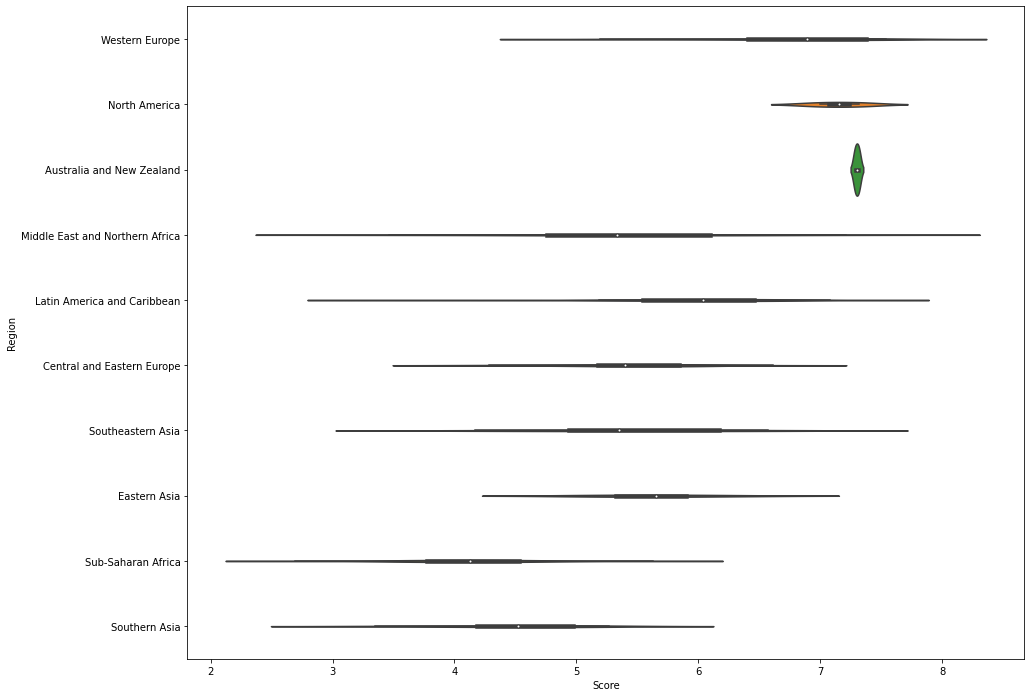

In [400]:
plt.rcParams['figure.figsize'] = (15, 12)
sns.violinplot(df_2017['Score'], df_2017['Region'])
plt.show()

2018

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<function matplotlib.pyplot.show>

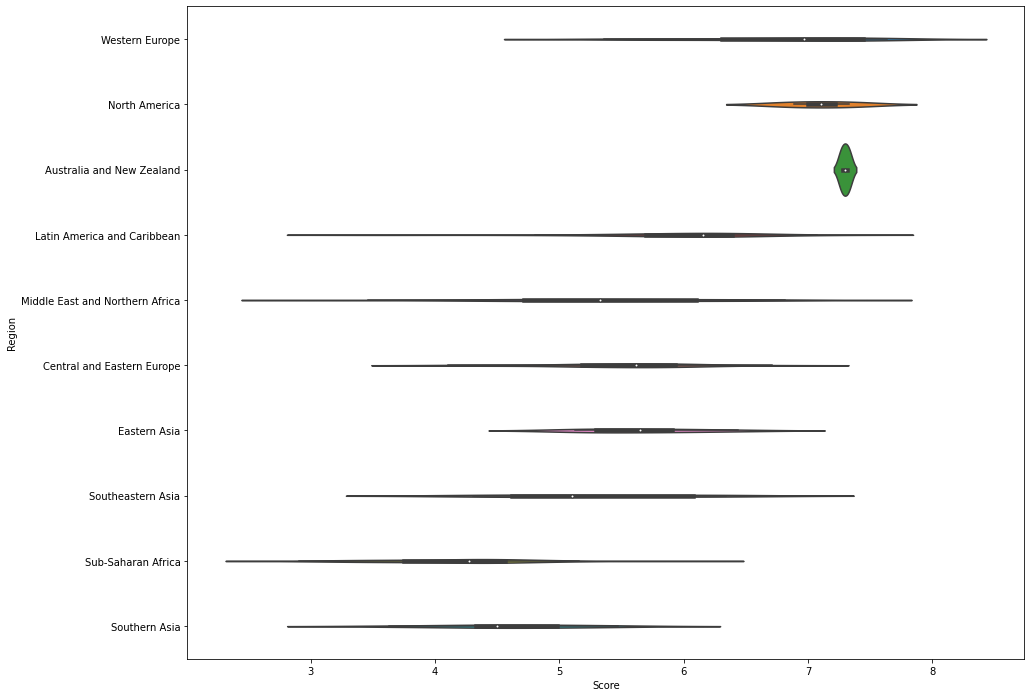

In [401]:
plt.rcParams['figure.figsize'] = (15, 12)
sns.violinplot(df_2018['Score'], df_2018['Region'])
plt.show

2019

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



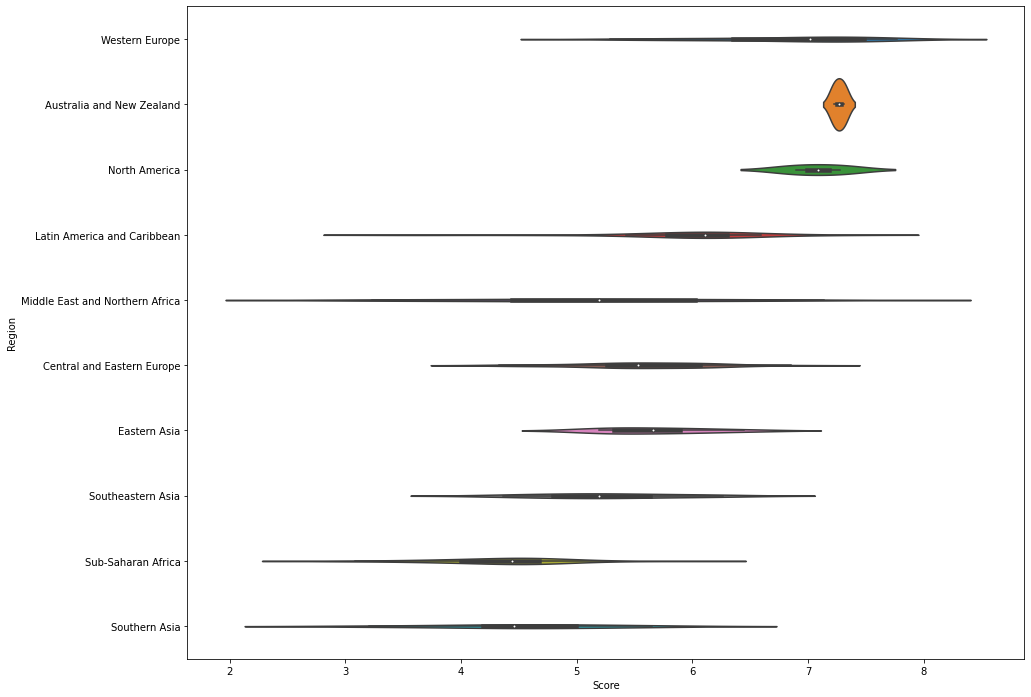

In [402]:
# Sebaran Happines Score di  tahun 2019 pada setiap region

plt.rcParams['figure.figsize'] = (15, 12)
sns.violinplot(df_2019['Score'], df_2019['Region'])
plt.show()

2020

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



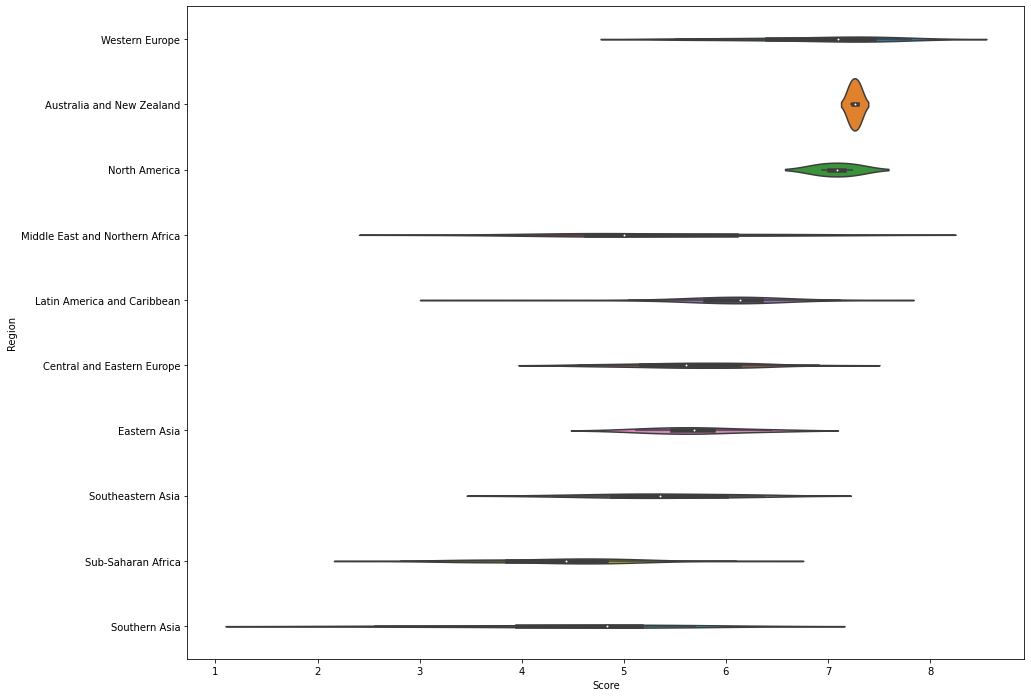

In [403]:
# Sebaran Happines Score di  tahun 2020 pada setiap region

plt.rcParams['figure.figsize'] = (15, 12)
sns.violinplot(df_2020['Score'], df_2020['Region'])
plt.show()

Berdasarkan Grafik sebaran data Happiness Score pada tahun 2017 - 2020 terlihat tidak terlalu banyak perubahan yang berarti. Peringkat top 3 setiap tahunnya selalu didominasi oleh Region Western Europe, North America, dan Australia and New Zealand. 

#### Correlation between Data

We want to see what factor has strong correlation to happiness score from every year in every region

Correlation between data in 2017

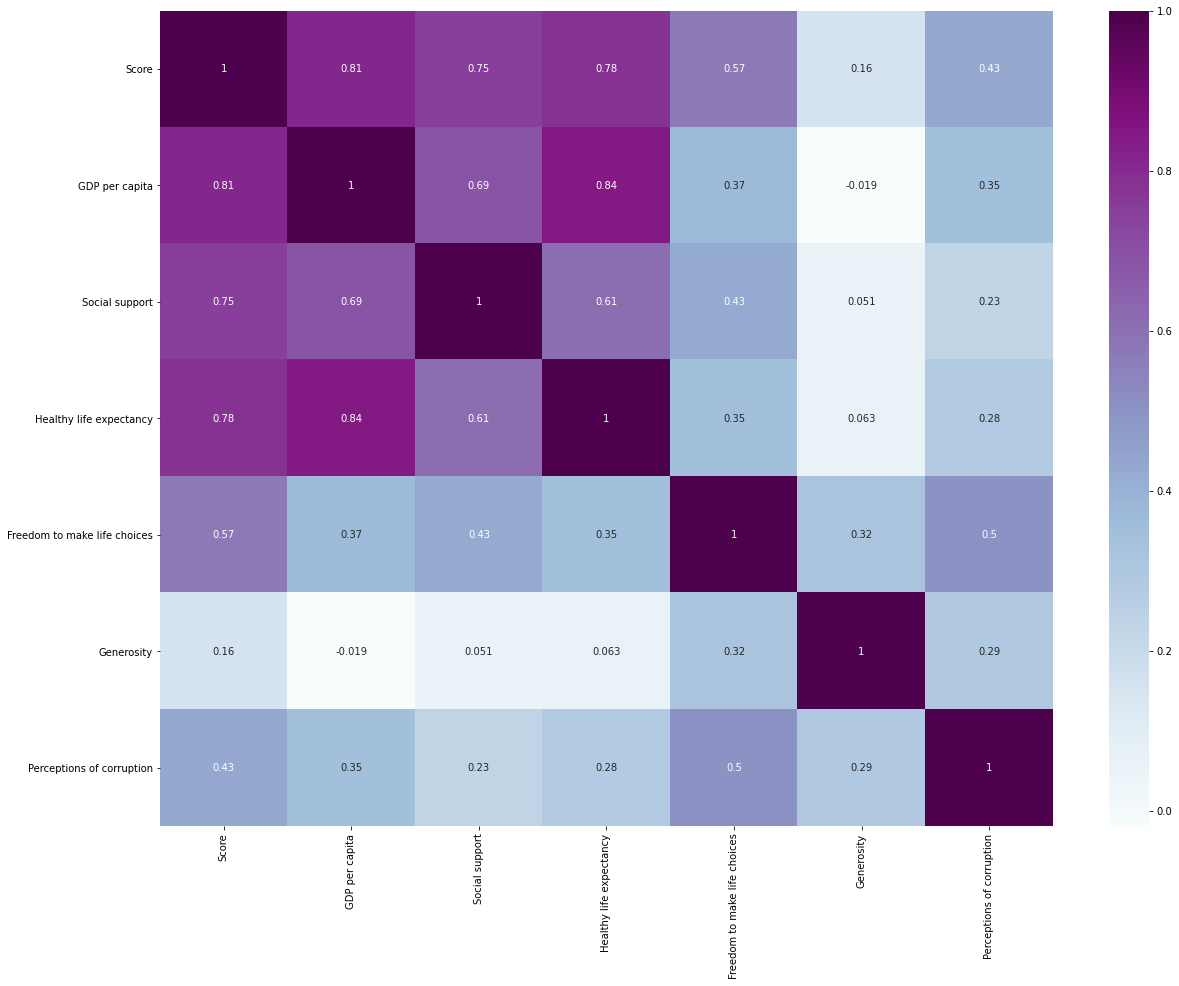

In [404]:
plt.rcParams['figure.figsize'] = (20, 15)
sns.heatmap(df_2017.corr(), cmap = 'BuPu', annot = True)

plt.show()

In 2017, GDP per Capita, Social Support, and Healthy Expectancy have high correlation to Happines Score

Correlation Between Data in 2018

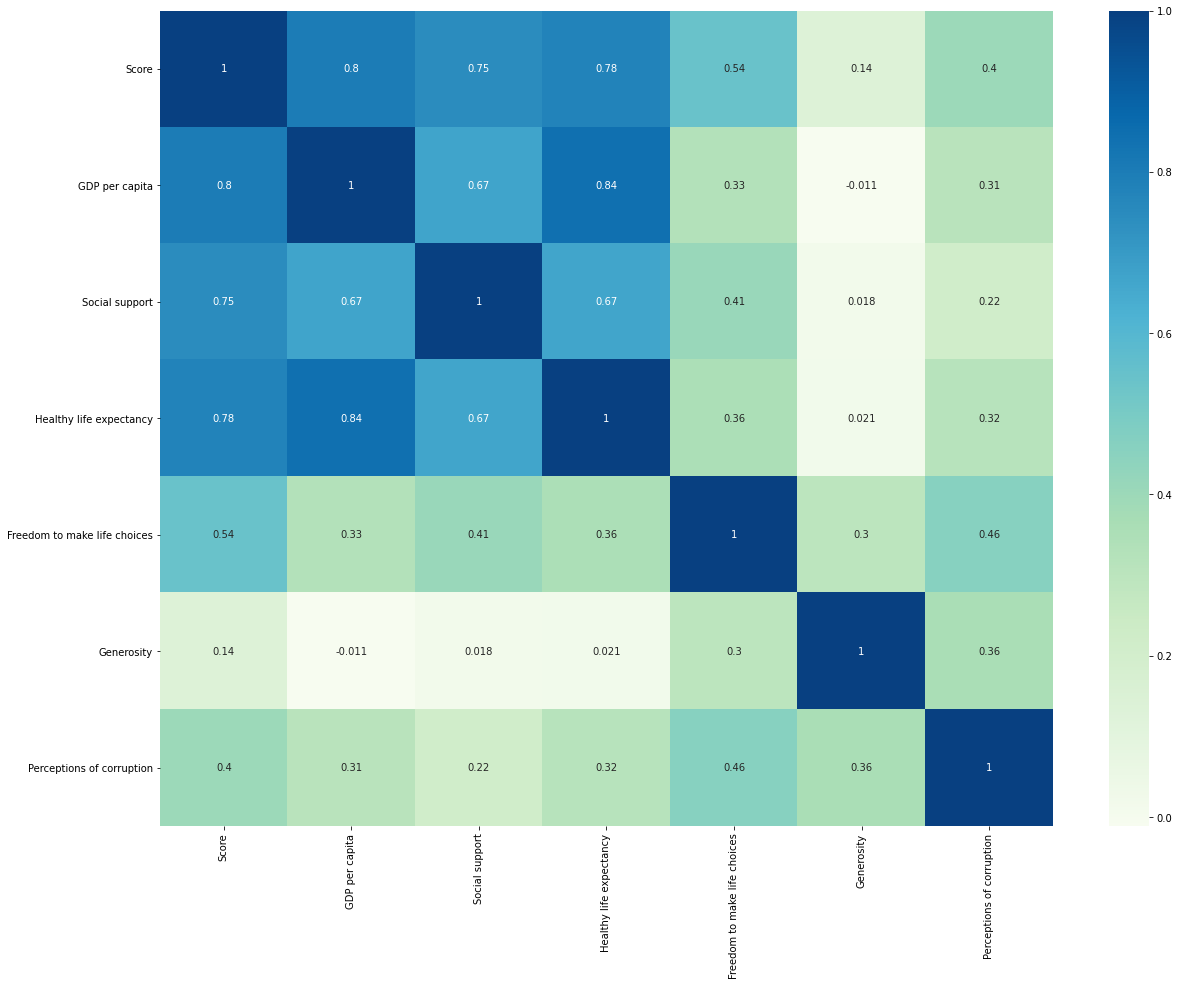

In [405]:
plt.rcParams['figure.figsize'] = (20, 15)
sns.heatmap(df_2018.corr(), cmap = 'GnBu', annot = True)

plt.show()

In 2018, only GDP per Capita and Healthy life ecpectancy have high correlation to Happiness Score. 

Correlation Between Data in 2019

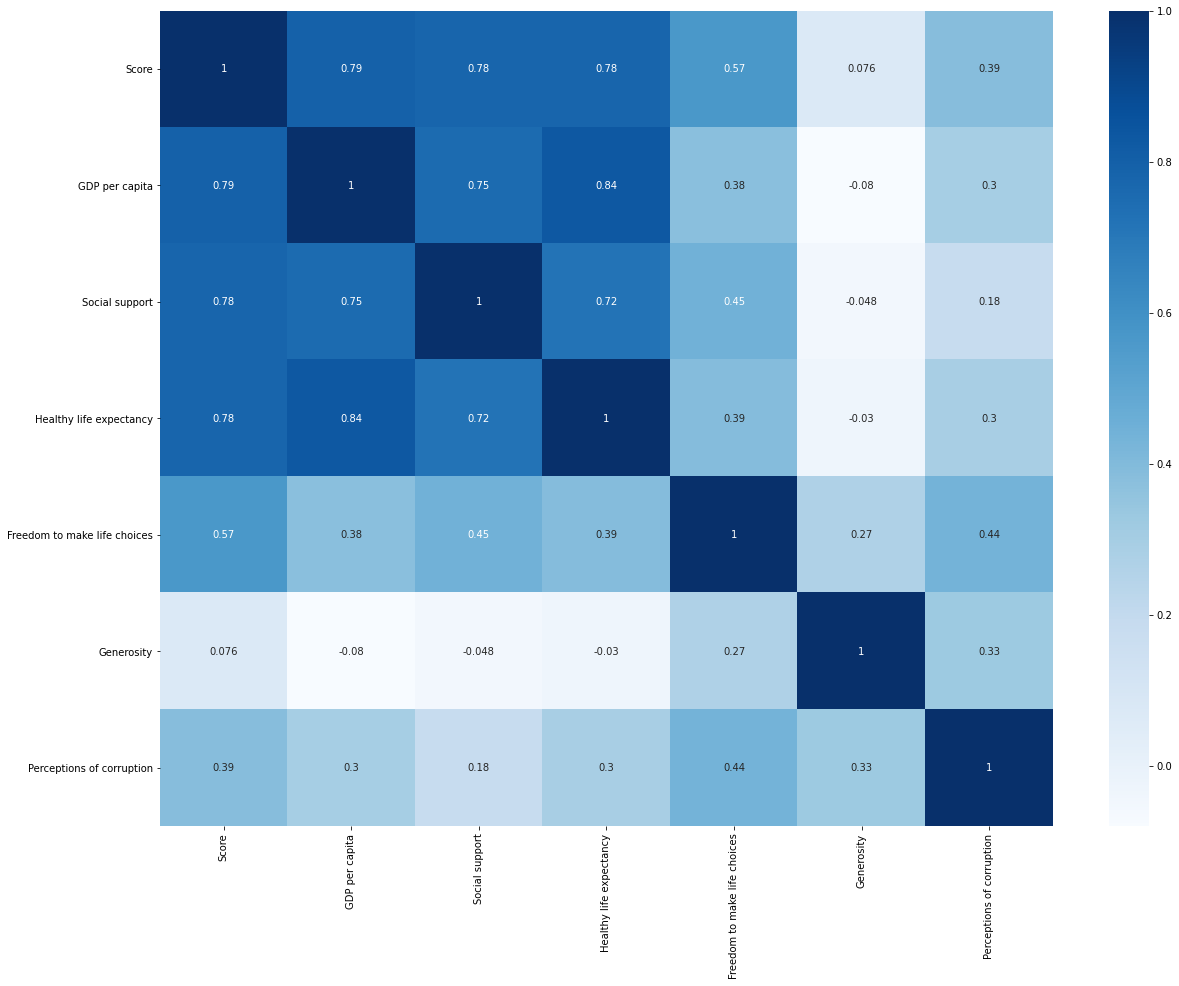

In [406]:
plt.rcParams['figure.figsize'] = (20, 15)
sns.heatmap(df_2019.corr(), cmap = 'Blues', annot = True)

plt.show()

Same with 2017, in 2019 GDP per Capita, Social Support, and Healthy life Expectancy have high correlation to Happiness Score 

Correlation Between Data in 2020

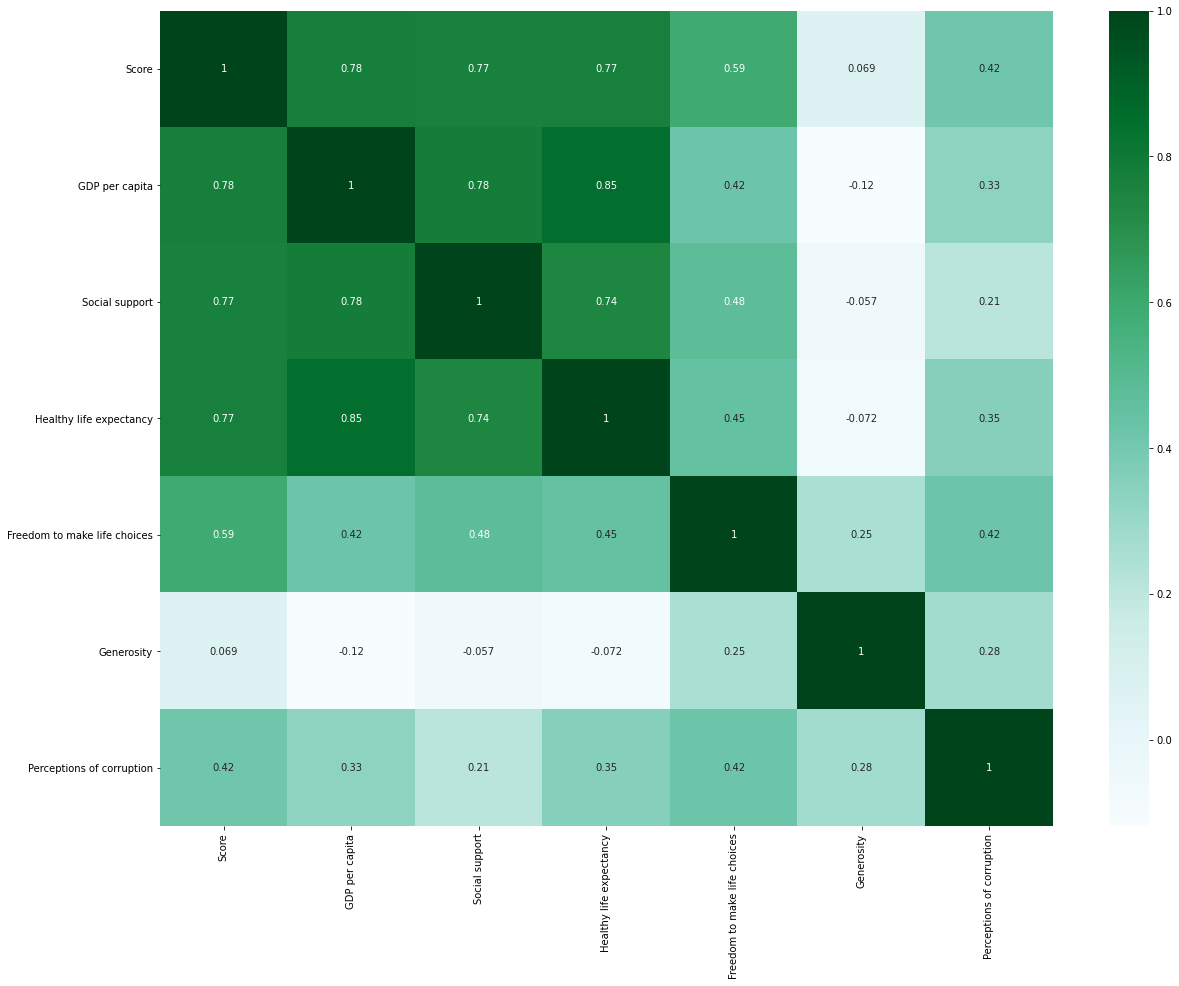

In [407]:
plt.rcParams['figure.figsize'] = (20, 15)
sns.heatmap(df_2020.corr(), cmap = 'BuGn', annot = True)

plt.show()

Sama seperti tahun-tahun sebelumnya, pada tahun 2020, GDP per Capita, Social Support dan Healthy life expectancy memiliki tingkat korelasi yang tinggi dengan Happines Score



**PS: In Every year GDP per Capita has high correlation level with Health life Expectancy and Social support. Money does guarantee happiness lol**

Correlation Between Data in Western Europe (2020)

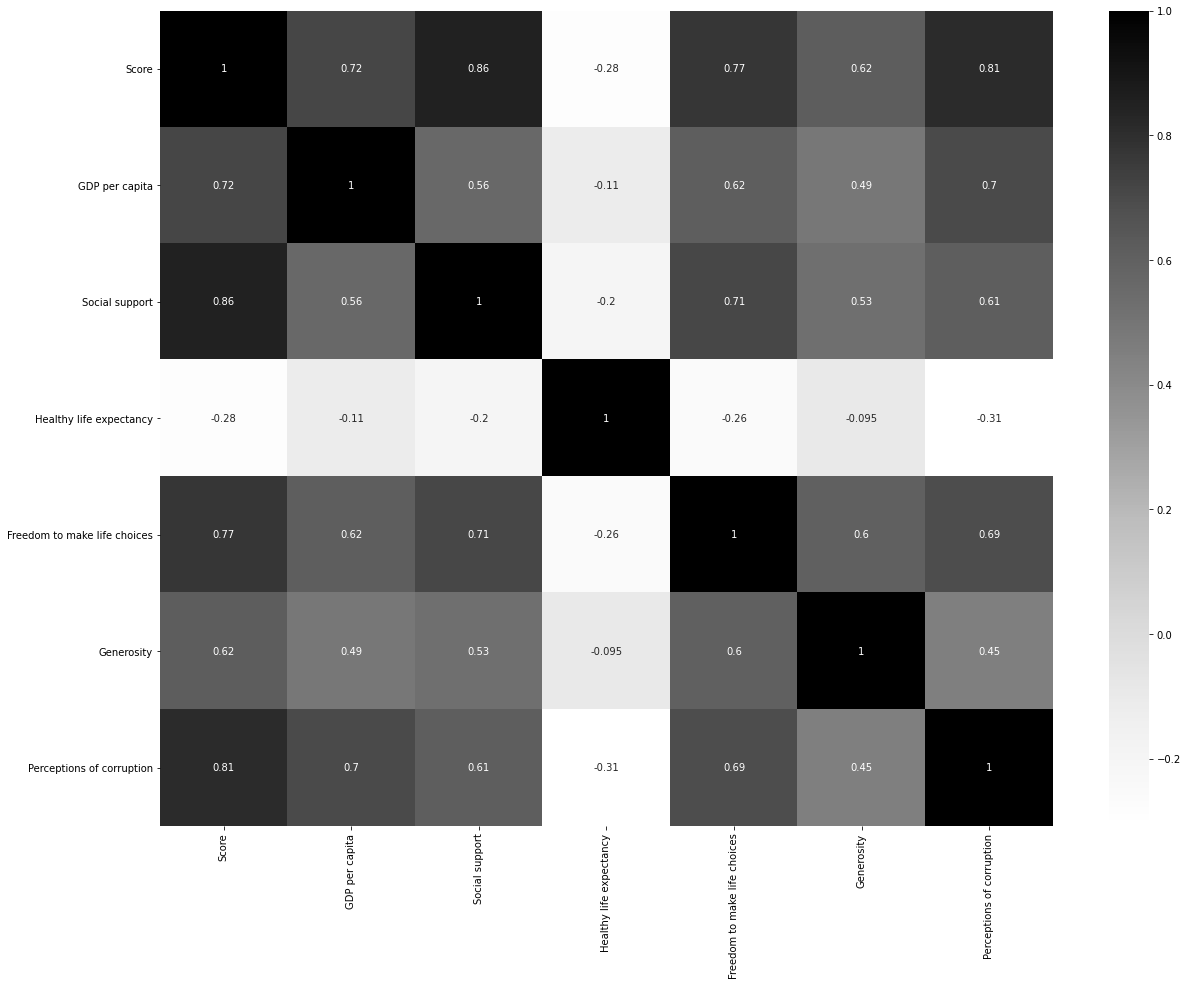

In [408]:
plt.rcParams['figure.figsize'] = (20, 15)

d = df_2020.loc[lambda df_2020: df_2020['Region'] == 'Western Europe']
sns.heatmap(d.corr(), cmap = 'Greys', annot = True)

plt.show()

Pada kawasan Western Europe, Happiness Score memiliki korelasi yang erat dengan Social Support dan GDP per Capita namun memiliki korelasi negatif dengan healthy life expectancy. Hal ini mungkin disebabkan dengan adanya pandemi global covid-19 yang terjadi di tahun 2020

Correlation Between Data in Eastern Asia (2020)

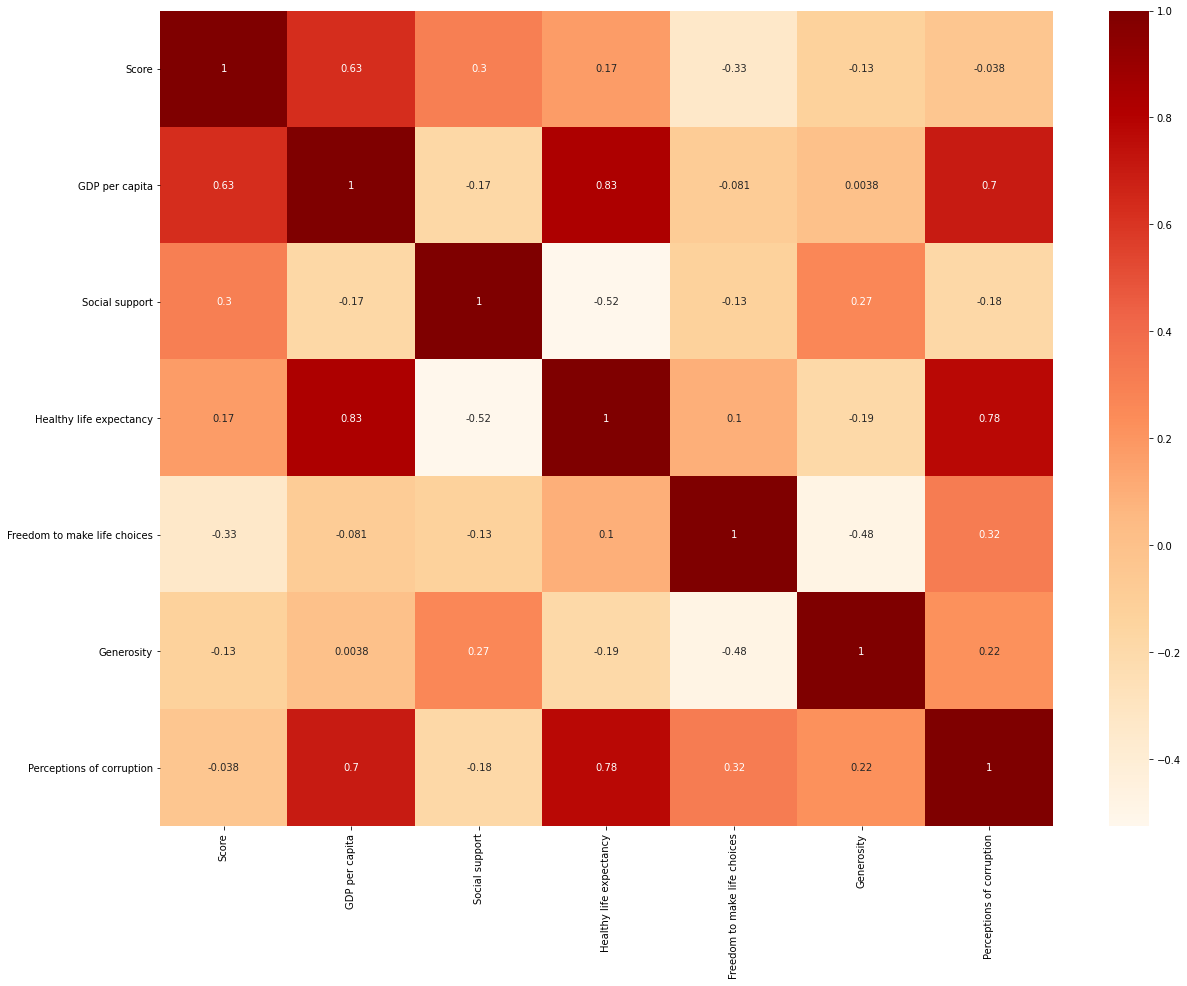

In [409]:
plt.rcParams['figure.figsize'] = (20, 15)

d = df_2020.loc[lambda df_2020: df_2020['Region'] == 'Eastern Asia']
sns.heatmap(d.corr(), cmap = 'OrRd', annot = True)

plt.show()

In 2020, GDP per Capita di Eastern Asia berkorelasi positif akan tetapi tidak terlalu kuat. GDP per Capita berkorelasi positif dengan Healthy life expectancy and Perceptions of Corruption

Correlation Between Data At North America (2020)

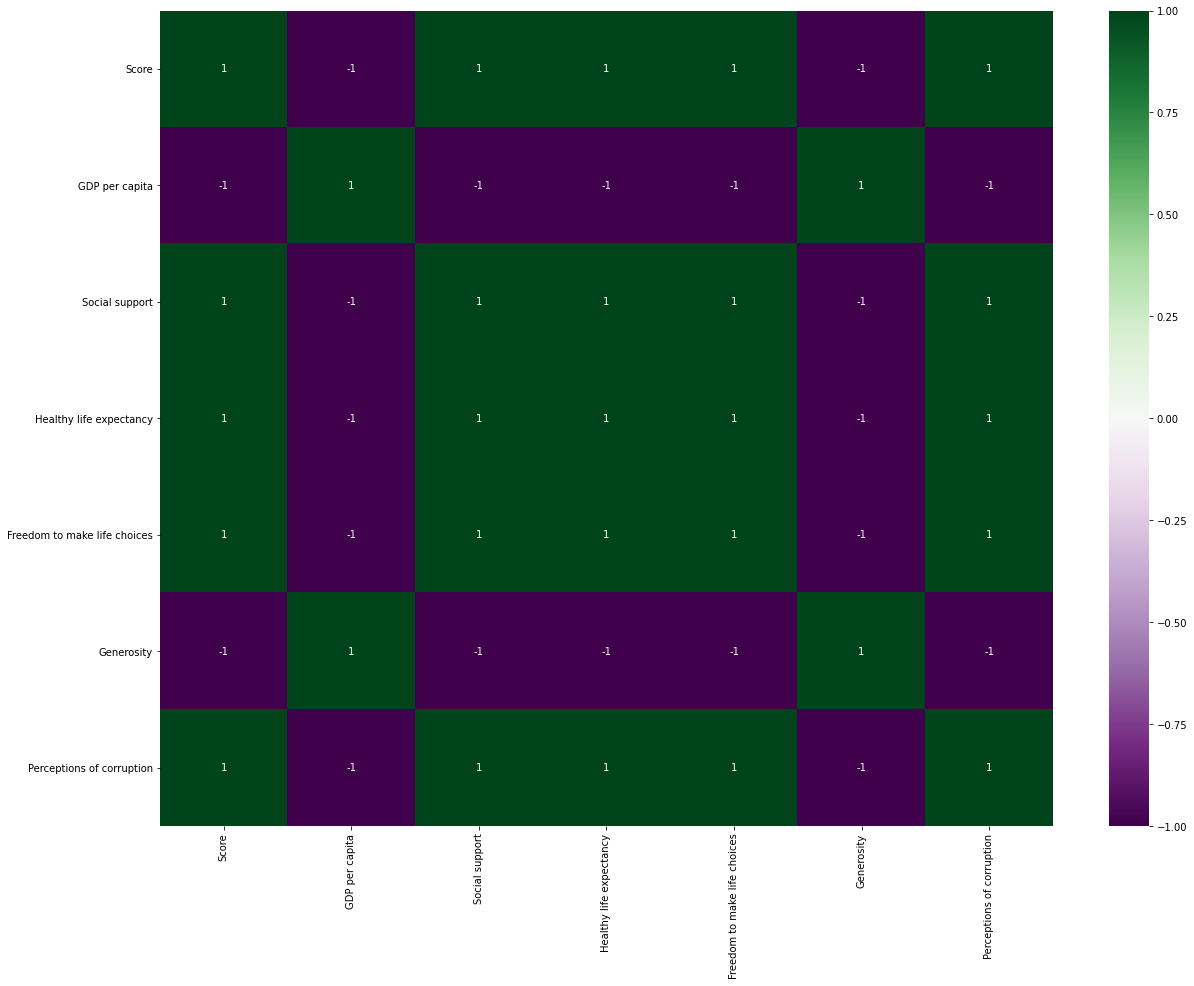

In [410]:
plt.rcParams['figure.figsize'] = (20, 15)

d = df_2020.loc[lambda df_2020: df_2020['Region'] == 'North America']
sns.heatmap(d.corr(), cmap = 'PRGn', annot = True)

plt.show()

In 2020, North America's Happiness Score memeiliki korelasi positif dengan Social Support, Helathy life expectancy, freedom to make life choices and Perceptions of corruption 

Correlation Between Data at Middle East and Northern Africa (2020)

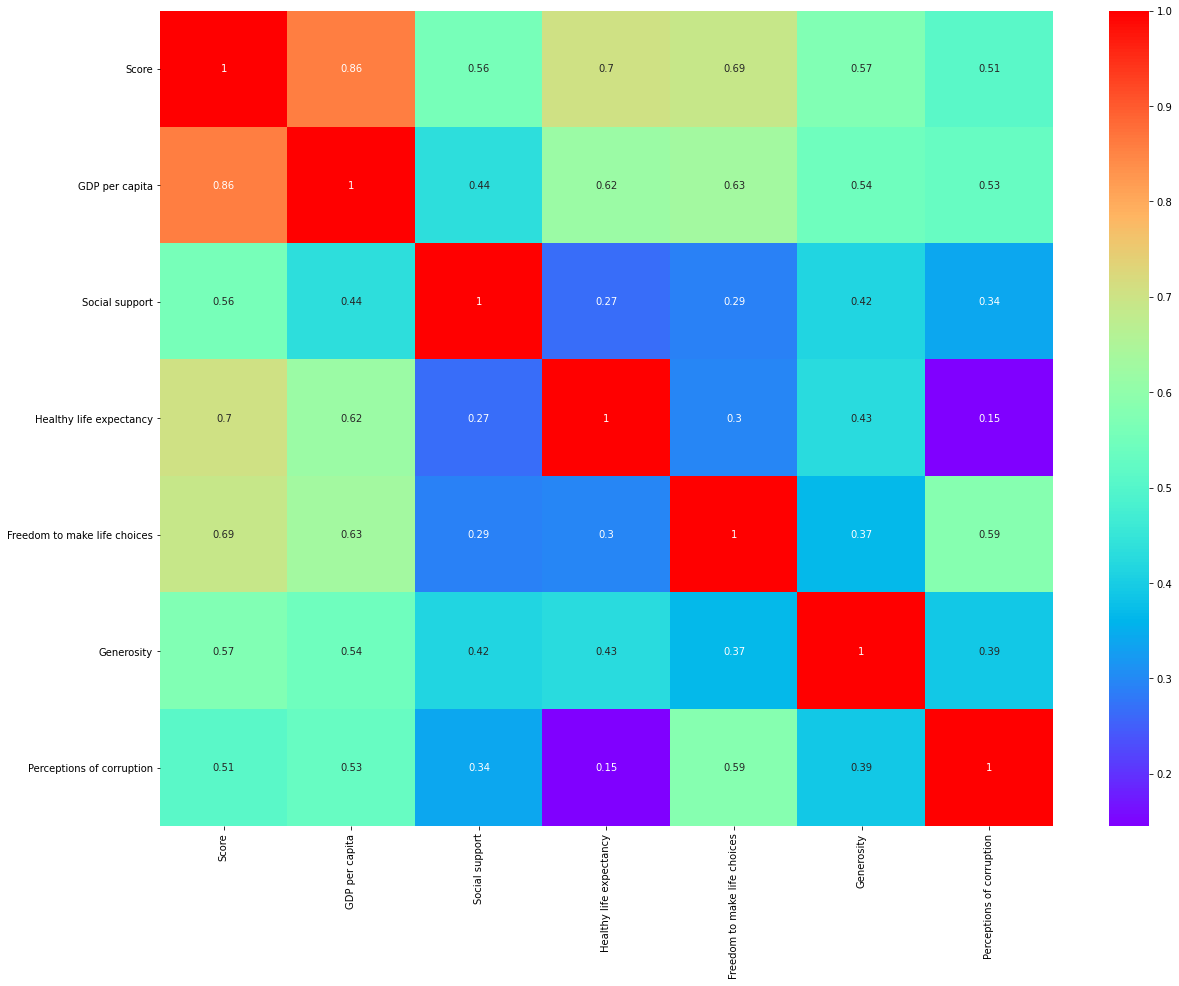

In [496]:
plt.rcParams['figure.figsize'] = (20, 15)

d = df_2020.loc[lambda dd_2020: df_2020['Region'] == 'Middle East and Northern Africa']

sns.heatmap(d.corr(), cmap = 'rainbow', annot = True)

plt.show()

Di Middle East and Northern Africa, happiness score berkorelasi positif hanay dengan GDP per Capita saja pada tahun 2020.

#### Top 10 Country Rank on Each Happiness Score's Factor in 2020

1. Generosity

In [501]:
df_2020[['Country', 'Generosity']].sort_values(by = 'Generosity',
                                                ascending = False).head(10)

,Country,Generosity
132,Myanmar,0.569814
83,Indonesia,0.542647
141,Haiti,0.463910
112,Gambia,0.425990
120,Kenya,0.393902
53,Thailand,0.376709
12,United Kingdom,0.373433
37,Uzbekistan,0.363311
3,Iceland,0.362330
21,Malta,0.341181


2. Perceptions of Corruption

In [502]:
df_2020[['Country', 'Perceptions of corruption']].sort_values(by = 'Perceptions of corruption',
                                                                     ascending = False).head(10)

,Country,Perceptions of corruption
30,Singapore,0.533162
1,Denmark,0.495260
149,Rwanda,0.485542
0,Finland,0.477857
7,New Zealand,0.461268
6,Sweden,0.442066
4,Norway,0.434101
2,Switzerland,0.407946
15,Ireland,0.373433
5,Netherlands,0.368570


3. Freedom to make life choices

In [503]:
df_2020[['Country', 'Freedom to make life choices']].sort_values(by = 'Freedom to make life choices',
                                                                     ascending = False).head(10)

,Country,Freedom to make life choices
37,Uzbekistan,0.693270
105,Cambodia,0.674940
4,Norway,0.670201
1,Denmark,0.665040
0,Finland,0.662317
3,Iceland,0.661981
20,United Arab Emirates,0.652936
82,Vietnam,0.650836
6,Sweden,0.650298
7,New Zealand,0.646790


4. Healthy Life Expectancy 

In [505]:
df_2020[['Country', 'Healthy life expectancy']].sort_values(by = 'Healthy life expectancy',
                                                                     ascending = False).head(10)

,Country,Healthy life expectancy
30,Singapore,1.137814
77,Hong Kong S.A.R. of China,1.136631
61,Japan,1.072881
27,Spain,1.051343
2,Switzerland,1.040533
22,France,1.029714
44,Cyprus,1.026125
75,North Cyprus,1.026125
11,Australia,1.022608
60,South Korea,1.022543


5. Social Support

In [506]:
df_2020[['Country', 'Social support']].sort_values(by = 'Social support',
                                                                     ascending = False).head(10)

,Country,Social support
3,Iceland,1.547567
94,Turkmenistan,1.510477
1,Denmark,1.503449
0,Finland,1.499526
4,Norway,1.495173
7,New Zealand,1.487218
11,Australia,1.477146
2,Switzerland,1.472403
15,Ireland,1.470596
32,Slovenia,1.464678


6. GDP per capita

In [507]:
df_2020[['Country', 'GDP per capita']].sort_values(by = 'GDP per capita',
                                                                     ascending = False).head(10)

,Country,GDP per capita
9,Luxembourg,1.536676
30,Singapore,1.519580
15,Ireland,1.446887
20,United Arab Emirates,1.431086
47,Kuwait,1.424834
4,Norway,1.424207
2,Switzerland,1.390774
77,Hong Kong S.A.R. of China,1.376746
17,United States,1.373987
5,Netherlands,1.338946


### Modeling

#### CLUSTERING 2017

Kolom "Country or region" adalah variabel category jadi perlu dihilangkan.

In [411]:
df_2017c = df_2017.drop('Country or region',axis=1)
df_2017c = df_2017c.drop('Region', axis=1)
df_2017c.head()

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964
1,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770
2,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527
3,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007
4,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612


In [412]:
df_2017c.eq(0).sum()

Score                           0
GDP per capita                  1
Social support                  1
Healthy life expectancy         1
Freedom to make life choices    1
Generosity                      1
Perceptions of corruption       1
dtype: int64

In [413]:
df_2017c.dtypes

Score                           float64
GDP per capita                  float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
dtype: object

In [414]:
rata_GDP7=df_2017c['GDP per capita'].astype('float').mean(axis=0)
print("Rerata GDP per capita 2017:", rata_GDP7)

Rerata GDP per capita 2017: 0.9847182019463474


In [415]:
df_2017c["GDP per capita"].replace(np.nan, rata_GDP7, inplace=True)

In [416]:
rata_social7=df_2017c['Social support'].astype('float').mean(axis=0)
print("Rerata Social support 2017:", rata_social7)

Rerata Social support 2017: 1.1888977504545641


In [417]:
df_2017c["Social support"].replace(np.nan, rata_social7, inplace=True)

In [418]:
rata_healthy7=df_2017c['Healthy life expectancy'].astype('float').mean(axis=0)
print("Rerata Healthy life expectancy 2017:", rata_healthy7)

Rerata Healthy life expectancy 2017: 0.5513407826123219


In [419]:
df_2017c["Healthy life expectancy"].replace(np.nan, rata_healthy7, inplace=True)

In [420]:
rata_freedom7=df_2017c['Freedom to make life choices'].astype('float').mean(axis=0)
print("Rerata Freedom to make life choices 2017:", rata_freedom7)

Rerata Freedom to make life choices 2017: 0.4087859728583886


In [421]:
df_2017c["Freedom to make life choices"].replace(np.nan, rata_freedom7, inplace=True)

In [422]:
rata_perceptions7=df_2017c['Perceptions of corruption'].astype('float').mean(axis=0)
print("Rerata Perceptions of corruption 2017:", rata_perceptions7)

Rerata Perceptions of corruption 2017: 0.12312022065142951


In [423]:
rata_generosity7=df_2017c['Generosity'].astype('float').mean(axis=0)
print("Rerata Generosity 2017:", rata_generosity7)

Rerata Generosity 2017: 0.24688347161657387


In [424]:
df_2017c["Generosity"].replace(np.nan, rata_generosity7, inplace=True)

In [425]:
df_2017c["Perceptions of corruption"].replace(np.nan, rata_perceptions7, inplace=True)

Normalizing berdasarkan standar deviation

In [426]:
from sklearn.preprocessing import StandardScaler
X7 = df_2017c.values[:,0:]
X7 = np.nan_to_num(X7)
Clus_dataSet = StandardScaler().fit_transform(X7)
Clus_dataSet

array([[ 1.93599602,  1.50618765,  1.20357658, ...,  1.51583565,
         0.8569643 ,  1.90308437],
       [ 1.92269283,  1.18651768,  1.26503623, ...,  1.45285861,
         0.80685634,  2.73999784],
       [ 1.90672969,  1.1823454 ,  1.47266877, ...,  1.46058981,
         1.70201314,  0.30006609],
       ...,
       [-1.77816933, -1.12910094, -0.51306362, ..., -0.12552914,
         0.79923322, -0.56334657],
       [-2.17193469, -2.12929212, -1.95262416, ..., -2.33348285,
        -0.31596505, -0.38459935],
       [-2.35994869, -2.34773594, -4.15212515, ..., -0.92262375,
         0.253028  , -0.65680192]])

K-Means Clustering

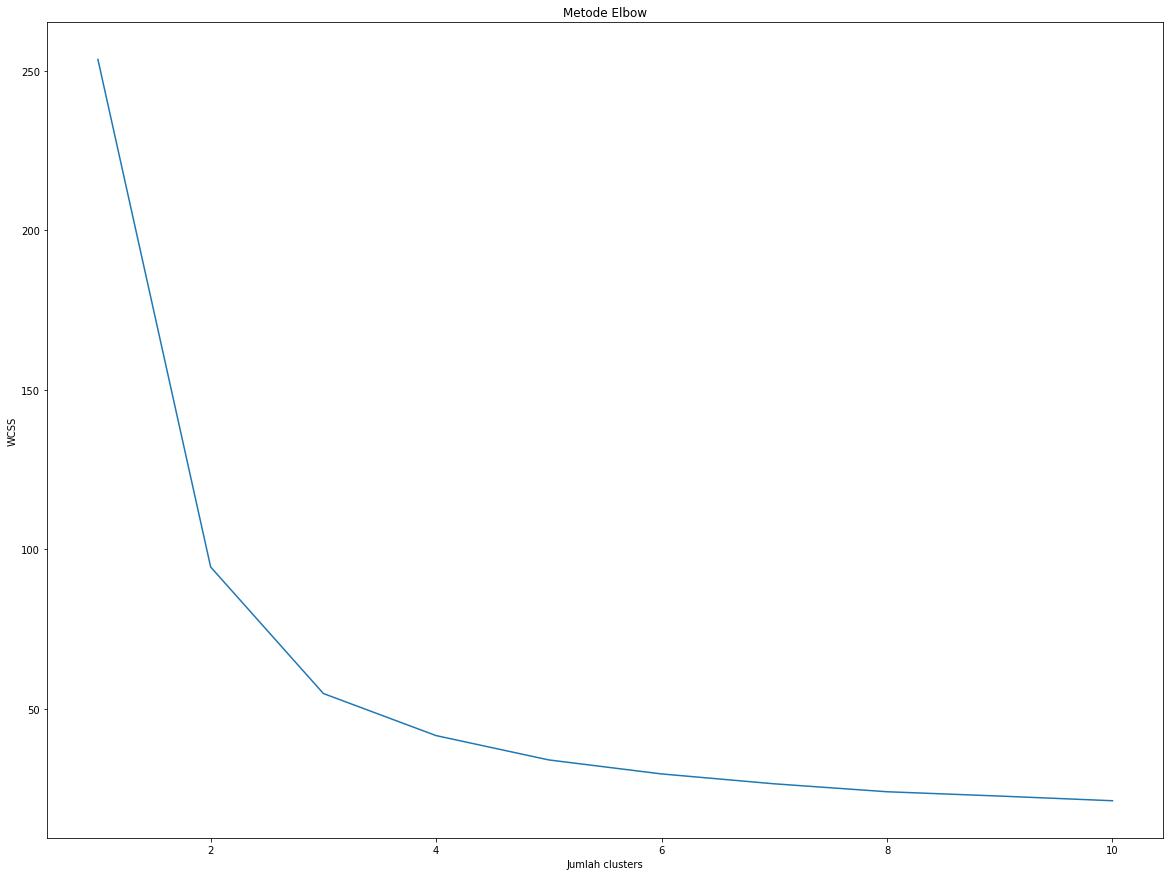

In [427]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans7 = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans7.fit(X7)
    wcss.append(kmeans7.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Metode Elbow')
plt.xlabel('Jumlah clusters')
plt.ylabel('WCSS')
plt.show()

In [428]:
clusterNum7 = 3
k_means7 = KMeans(init = "k-means++", n_clusters = clusterNum7, n_init = 12)
k_means7.fit(X7)
labels7 = k_means7.labels_
print(labels7)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2]


In [429]:
df_2017c["Cluster"] = labels7
df_2017c

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Cluster
0,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,1
1,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,1
2,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,1
3,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,1
4,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,1
...,...,...,...,...,...,...,...,...
150,3.471,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,2
151,3.462,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,2
152,3.349,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,2
153,2.905,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,2


Cek nilai centroid dengan rata-rata features disetiap cluster.

In [430]:
df_2017c.groupby('Cluster').mean()

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Cluster,,,,,,,
0,5.454108,1.065176,1.258058,0.620656,0.384246,0.206652,0.083944
1,6.802375,1.412830,1.423133,0.760655,0.537888,0.307135,0.212035
2,4.065220,0.537633,0.911602,0.293780,0.337407,0.250983,0.102917


Visualisasi hasil cluster

Distribusi berdasarkan Social support dan Healthy life expectancy

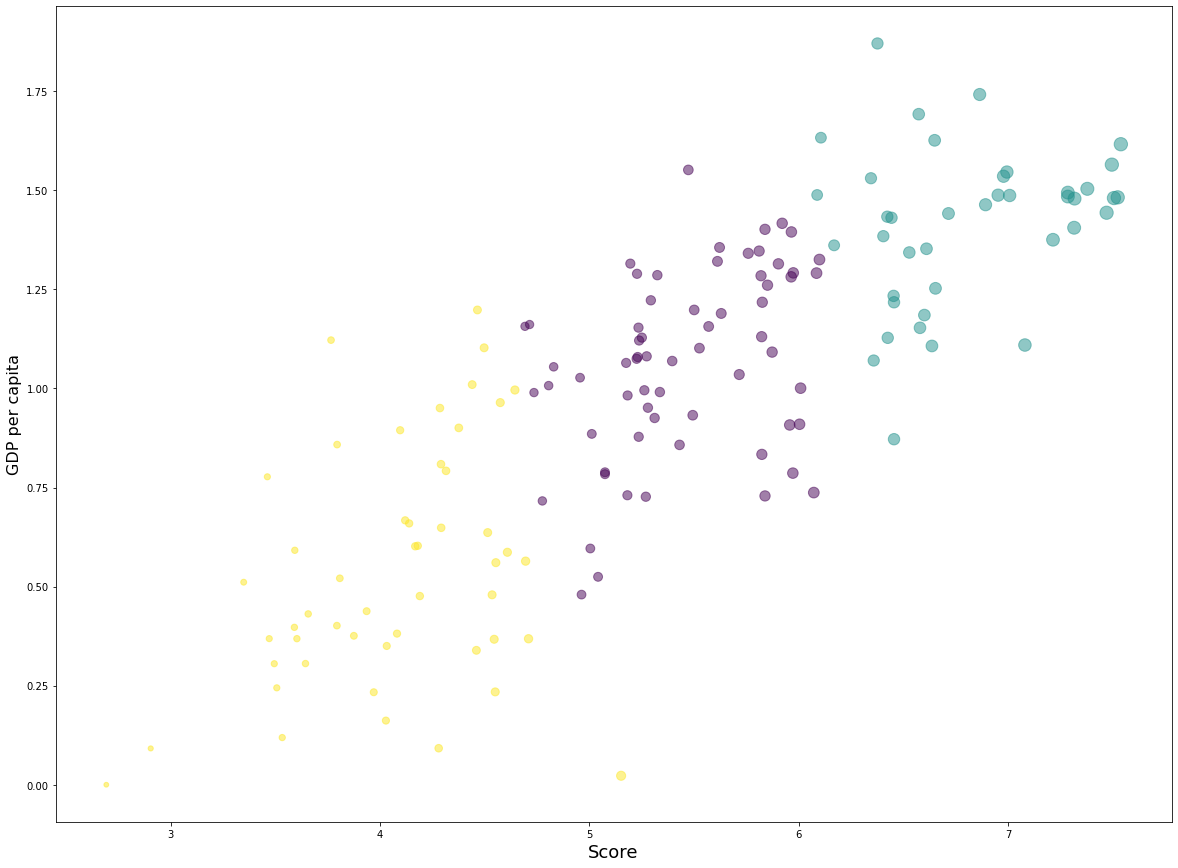

In [431]:
area = np.pi * ( X7[:, 0])**2
plt.scatter(X7[:, 0], X7[:, 1], s=area, c=labels7.astype(np.float), alpha=0.5)
plt.xlabel('Score', fontsize=18)
plt.ylabel('GDP per capita', fontsize=16)
plt.show()

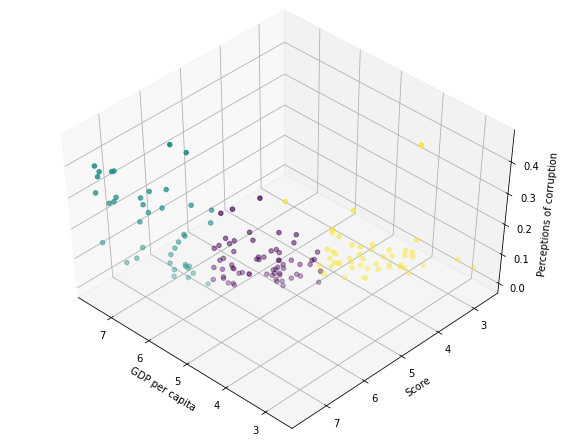

In [432]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
plt.cla()
# plt.ylabel('Score', fontsize=18)
# plt.xlabel('GDP per capita', fontsize=16)
# plt.zlabel('Perceptions of corruption', fontsize=16)
ax.set_xlabel('GDP per capita')
ax.set_ylabel('Score')
ax.set_zlabel('Perceptions of corruption')
ax.scatter(X7[:, 0], X7[:, 0], X7[:, 6], c= labels7.astype(np.float))

#### CLUSTERING 2020

In [433]:
df_2020c = df_2020.drop('Country', axis=1)
df_2020c = df_2020c.drop('Region', axis=1)
df_2020c.head()

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,7.8087,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857
1,7.6456,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260
2,7.5599,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946
3,7.5045,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541
4,7.4880,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101


In [434]:
df_2020c.dtypes

Score                           float64
GDP per capita                  float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
dtype: object

In [435]:
df_2020c.eq(0).sum()

Score                           0
GDP per capita                  1
Social support                  1
Healthy life expectancy         1
Freedom to make life choices    1
Generosity                      1
Perceptions of corruption       1
dtype: int64

In [436]:
rata_GDP0=df_2020c['GDP per capita'].astype('float').mean(axis=0)
print("Rerata GDP per capita 2020:", rata_GDP0)

Rerata GDP per capita 2020: 0.8687711374870702


In [437]:
df_2020c["GDP per capita"].replace(np.nan, rata_GDP0, inplace=True)

In [438]:
rata_social0=df_2020c['Social support'].astype('float').mean(axis=0)
print("Rerata Social support 2020:", rata_social0)

Rerata Social support 2020: 1.1556066816149195


In [439]:
df_2020c["Social support"].replace(np.nan, rata_social0, inplace=True)

In [440]:
rata_healthy0=df_2020c['Healthy life expectancy'].astype('float').mean(axis=0)
print("Rerata Healthy life expectancy 2020:", rata_healthy0)

Rerata Healthy life expectancy 2020: 0.692869072207828


In [441]:
df_2020c["Healthy life expectancy"].replace(np.nan, rata_healthy0, inplace=True)

In [442]:
rata_freedom0=df_2020c['Freedom to make life choices'].astype('float').mean(axis=0)
print("Rerata Freedom to make life choices 2020:", rata_freedom0)

Rerata Freedom to make life choices 2020: 0.4635830325336238


In [443]:
df_2020c["Freedom to make life choices"].replace(np.nan, rata_freedom0, inplace=True)

In [444]:

rata_generosity0=df_2020c['Generosity'].astype('float').mean(axis=0)
print("Rerata Generosity 2020:", rata_generosity0)

Rerata Generosity 2020: 0.18937483729392873


In [445]:
df_2020c["Generosity"].replace(np.nan, rata_generosity0, inplace=True)

In [446]:
rata_perceptions0=df_2020c['Perceptions of corruption'].astype('float').mean(axis=0)
print("Rerata Perceptions of corruption 2020:", rata_perceptions0)

Rerata Perceptions of corruption 2020: 0.13071751432094625


In [447]:
df_2020c["Perceptions of corruption"].replace(np.nan, rata_perceptions0, inplace=True)

In [448]:
from sklearn.preprocessing import StandardScaler
X0 = df_2020c.values[:,0:]
X0 = np.nan_to_num(X0)
Clus_dataSet0 = StandardScaler().fit_transform(X0)
Clus_dataSet0

array([[ 2.10661952,  1.12182687,  1.20282353, ...,  1.4123599 ,
        -0.29682884,  3.07948805],
       [ 1.9595007 ,  1.23432523,  1.21654488, ...,  1.43171282,
         0.53379876,  3.23387122],
       [ 1.88219801,  1.40627109,  1.10796527, ...,  1.17526106,
         0.79623216,  2.45930209],
       ...,
       [-1.96101593, -1.19399548, -0.37692001, ..., -0.61245168,
        -0.37998114, -0.44167927],
       [-2.39632821, -1.56167403, -2.10658333, ..., -2.82831843,
         0.20544881, -0.17352375],
       [-2.62156136, -1.53036212, -2.79502813, ..., -3.29459   ,
        -0.54100918, -1.14872536]])

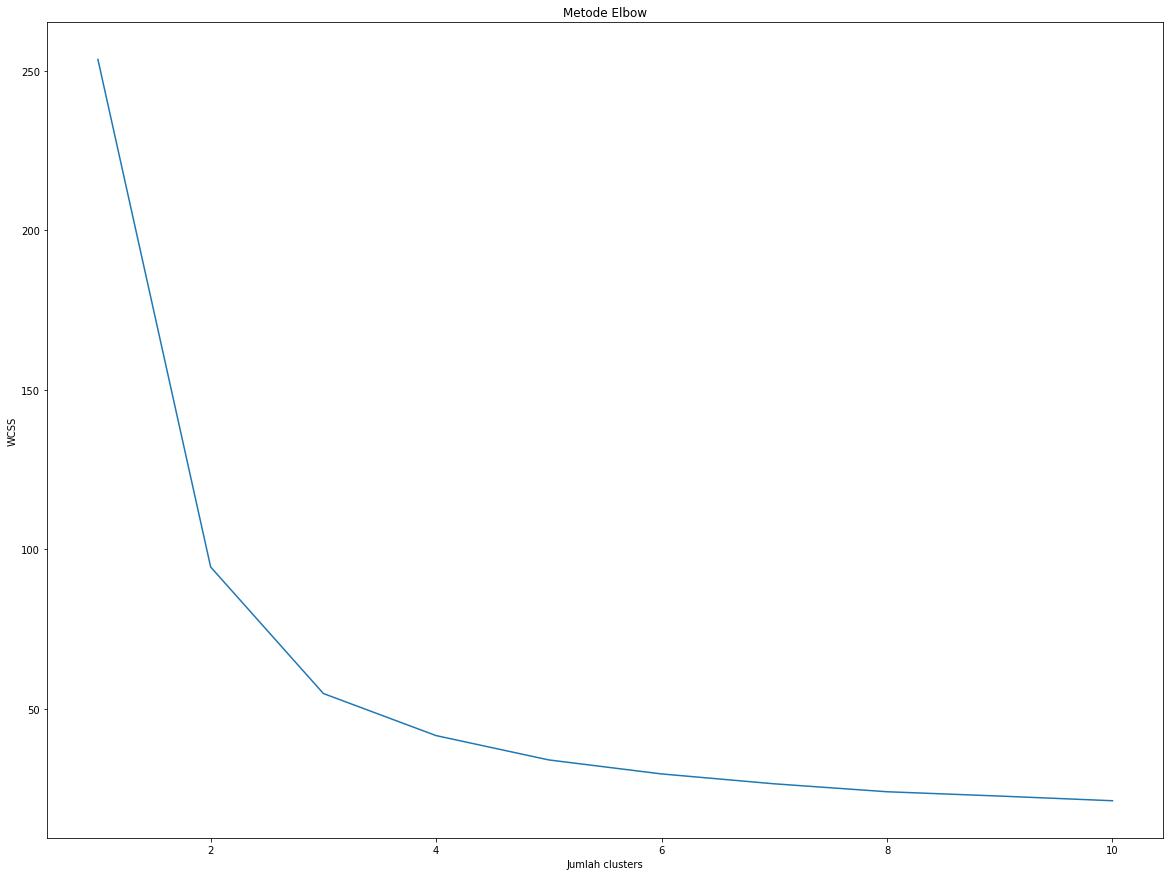

In [449]:
from sklearn.cluster import KMeans
wcss0 = []
for i in range(1, 11):
    kmeans0 = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans0.fit(X0)
    wcss0.append(kmeans0.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Metode Elbow')
plt.xlabel('Jumlah clusters')
plt.ylabel('WCSS')
plt.show()

In [450]:
clusterNum0 = 3
k_means0 = KMeans(init = "k-means++", n_clusters = clusterNum0, n_init = 12)
k_means0.fit(X0)
labels0 = k_means0.labels_
print(labels0)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 1 1 2 1 2 2 1 1 2 2 2 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1]


In [451]:
df_2020c["Cluster"] = labels0
df_2020c

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Cluster
0,7.8087,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,0
1,7.6456,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,0
2,7.5599,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,0
3,7.5045,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,0
4,7.4880,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,0
...,...,...,...,...,...,...,...,...
148,3.4759,0.041072,0.000000,0.000000,0.292814,0.253513,0.028265,1
149,3.3123,0.343243,0.522876,0.572383,0.604088,0.235705,0.485542,1
150,3.2992,0.425564,1.047835,0.375038,0.377405,0.151349,0.080929,1
151,2.8166,0.289083,0.553279,0.208809,0.065609,0.209935,0.111157,1


In [452]:
df_2020c.groupby('Cluster').mean()

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Cluster,,,,,,,
0,7.166575,1.321179,1.436338,0.978436,0.599886,0.253265,0.305817
1,4.384207,0.534422,0.887365,0.455561,0.381764,0.195622,0.104267
2,5.852519,1.009029,1.297153,0.804960,0.488873,0.161222,0.092645


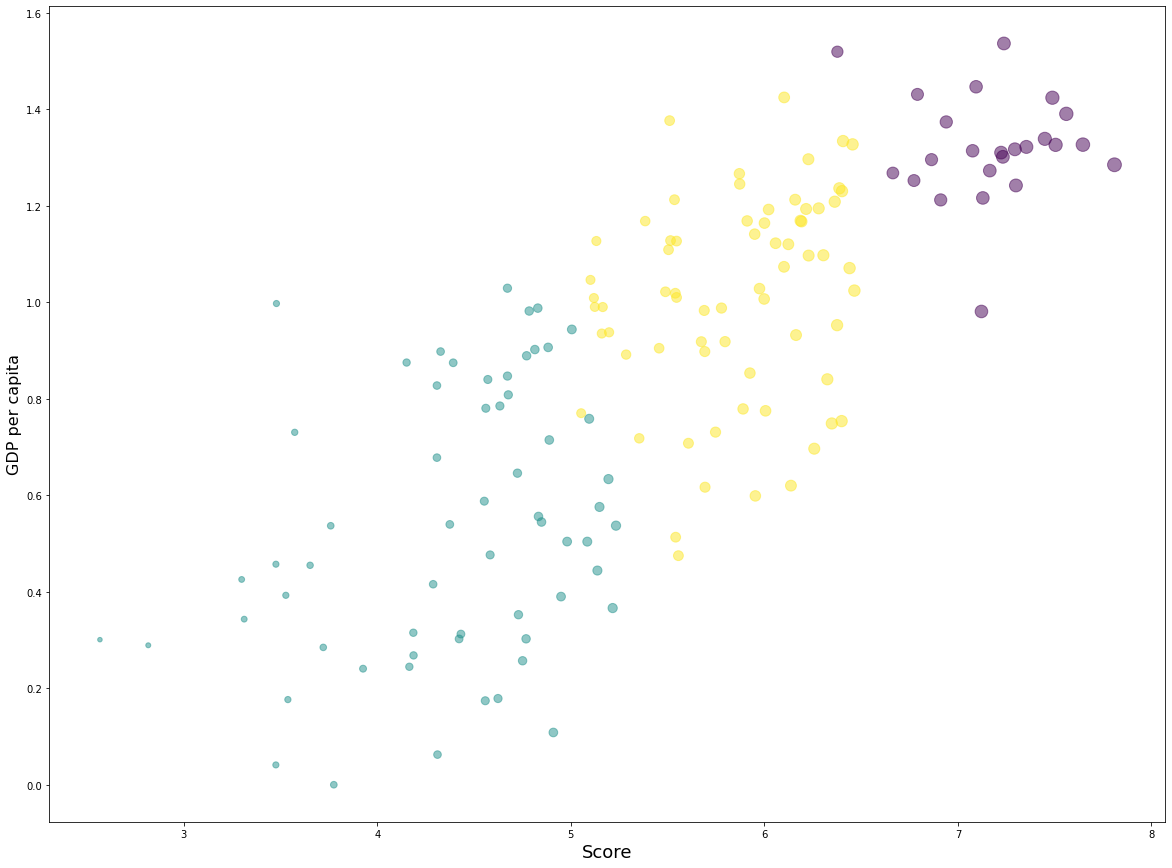

In [453]:
area = np.pi * ( X0[:, 0])**2
plt.scatter(X0[:, 0], X0[:, 1], s=area, c=labels0.astype(np.float), alpha=0.5)
plt.xlabel('Score', fontsize=18)
plt.ylabel('GDP per capita', fontsize=16)
plt.show()

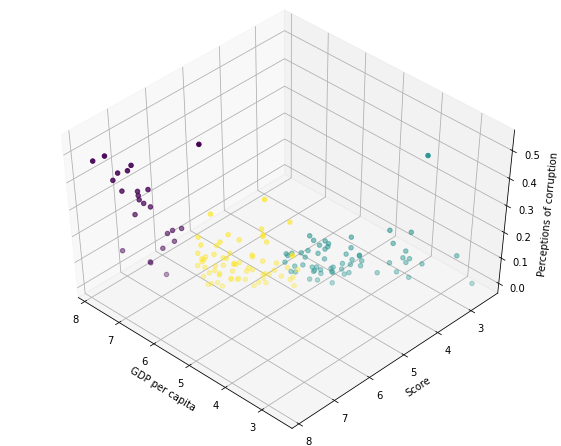

In [454]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
plt.cla()
# plt.ylabel('Score', fontsize=18)
# plt.xlabel('GDP per capita', fontsize=16)
# plt.zlabel('Perceptions of corruption', fontsize=16)
ax.set_xlabel('GDP per capita')
ax.set_ylabel('Score')
ax.set_zlabel('Perceptions of corruption')
ax.scatter(X0[:, 0], X0[:, 0], X0[:, 6], c= labels0.astype(np.float))

In [455]:
#Evaluation

from sklearn.metrics import silhouette_samples, silhouette_score

# Get silhouette samples
silhouette_vals_2017 = silhouette_samples(Clus_dataSet, labels7)
silhouette_vals_2020 = silhouette_samples(Clus_dataSet0, labels0)

# Get the average silhouette score and plot it
avg_score_2017 = np.mean(silhouette_vals_2017)
avg_score_2020 = np.mean(silhouette_vals_2020)

print("Rerata Silhouette Koefisien Data thn 2017: {:5.5f}".format(avg_score_2017))
print("Rerata Silhouette Koefisien Data thn 2020: {:5.5f}".format(avg_score_2020))

Rerata Silhouette Koefisien Data thn 2017: 0.20755
Rerata Silhouette Koefisien Data thn 2020: 0.27290


In [456]:
pip install pycountry

In [457]:
pip install geopandas

In [458]:
pip install mapclassify

In [459]:
# World Map Visualization

import pycountry 
import geopandas
import mapclassify

def alpha3code(column):
    CODE=[]
    for country in column:
        try:
            code=pycountry.countries.get(name=country).alpha_3
           # .alpha_3 means 3-letter country code 
           # .alpha_2 means 2-letter country code
            CODE.append(code)
        except:
            CODE.append('None')
    return CODE
    
# create a column for code 
df_2017c['Country'] = df_2017['Country or region']
df_2020c['Country'] = df_2020['Country']

df_2017c['CODE'] = alpha3code(df_2017['Country or region'])
df_2020c['CODE'] = alpha3code(df_2020['Country'])

In [460]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# rename the columns so that we can merge with our data
world.columns=['pop_est', 'continent', 'name', 'CODE', 'gdp_md_est', 'geometry']
world = world.drop(columns=['pop_est','name','gdp_md_est'])

# then merge with our data 
merge_2017=pd.merge(world,df_2017c,on='CODE')
merge_2020=pd.merge(world,df_2020c,on='CODE')

/usr/local/lib/python3.6/dist-packages/mapclassify/classifiers.py:236: UserWarning:


/usr/local/lib/python3.6/dist-packages/mapclassify/classifiers.py:238: UserWarning:




Text(0.5, 1.0, '2017 Happiness Word Scores')

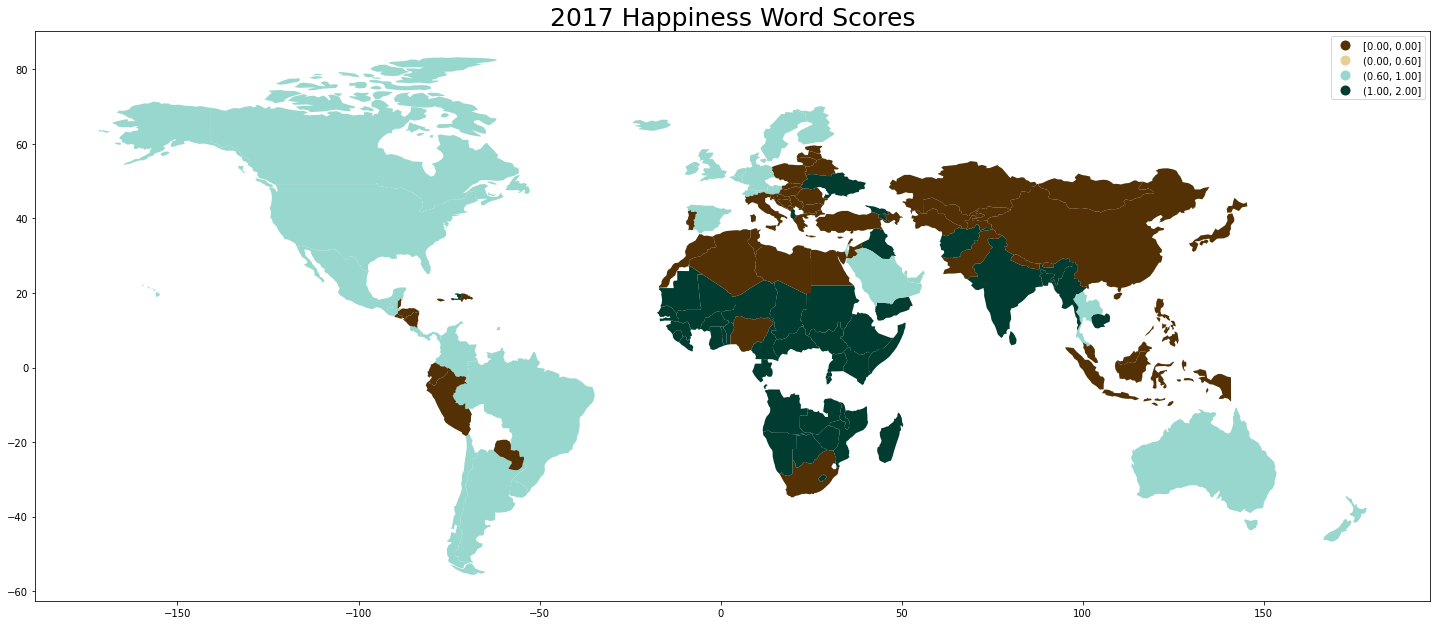

In [461]:
merge_2017.plot(column='Cluster', scheme="quantiles",
           figsize=(25, 20),
           legend=True ,cmap='BrBG')

plt.title('2017 Happiness Word Scores',fontsize=25)

/usr/local/lib/python3.6/dist-packages/mapclassify/classifiers.py:236: UserWarning:


/usr/local/lib/python3.6/dist-packages/mapclassify/classifiers.py:238: UserWarning:




Text(0.5, 1.0, '2020 Happiness Word Scores')

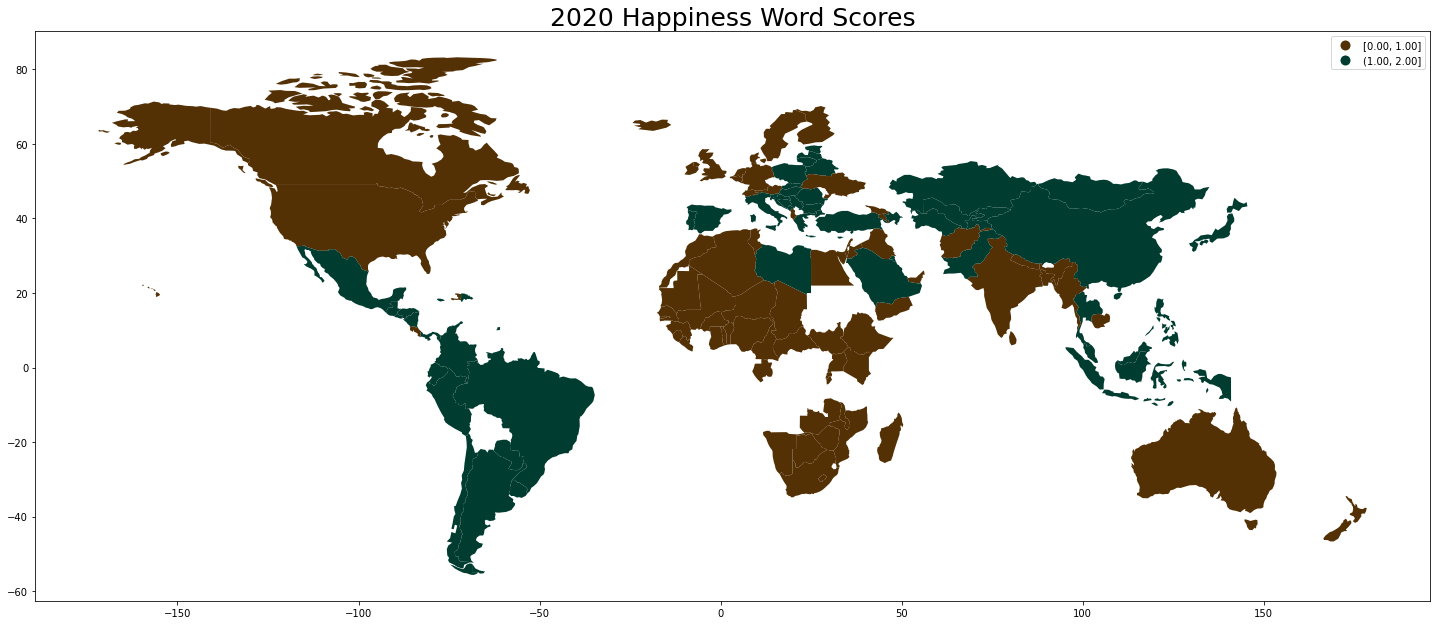

In [462]:
merge_2020.plot(column='Cluster', scheme="quantiles",
           figsize=(25, 20),
           legend=True ,cmap='BrBG')

plt.title('2020 Happiness Word Scores',fontsize=25)

#### PREDIKSI

In [464]:
import io
from google.colab import files

import numpy as np
import pandas as pd
import tensorflow as tf

from keras import backend as K
from keras import callbacks
from keras import *
from keras.callbacks import History
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD, Adam
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import layers 

from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [465]:
uploaded = files.upload()

Saving Data Challenge 2.xlsx to Data Challenge 2 (4).xlsx


In [466]:
# Read Data
df = pd.read_excel('Data Challenge 2.xlsx', sheet_name = [0,1,2,3])
df_2017 = df[0] 
df_2018 = df[1] 
df_2019 = df[2] 
df_2020 = df[3]

In [467]:
# Replacing Coutry name to standard name
df_2019['Country or region'] = df_2019['Country or region'].replace(['Taiwan','Trinidad & Tobago','Northern Cyprus', 'Hong Kong', 'North Macedonia'],
                                                                    ['Taiwan Province of China', 'Trinidad and Tobago','North Cyprus', 'Hong Kong S.A.R. of China', 'Macedonia'])

df_2018['Country or region'] = df_2018['Country or region'].replace(['Taiwan','Trinidad & Tobago','Northern Cyprus', 'Hong Kong', 'North Macedonia'],
                                                                    ['Taiwan Province of China', 'Trinidad and Tobago','North Cyprus', 'Hong Kong S.A.R. of China', 'Macedonia'])

df_2017['Country or region'] = df_2017['Country or region'].replace(['Hong Kong S.A.R., China'],['Hong Kong S.A.R. of China'])

In [468]:
# Join Data 2017 - 2020
df_result = pd.concat([df_2017, df_2018, df_2019, df_2020], join='inner')

In [469]:
df_result.head()

,Region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Western Europe,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964
1,Western Europe,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770
2,Western Europe,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527
3,Western Europe,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007
4,Western Europe,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612


In [470]:
# Statistical Summary
df_result.describe()

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000,619.000000
mean,5.402304,0.912617,1.191818,0.641598,0.429732,0.200507,0.119059
std,1.117254,0.397767,0.294213,0.254581,0.152100,0.111452,0.101742
min,2.566900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.556675,0.609500,1.037894,0.468752,0.331300,0.117162,0.052000
50%,5.385150,0.980054,1.245560,0.682323,0.450029,0.187000,0.088174
75%,6.191925,1.224500,1.430250,0.829021,0.549887,0.261073,0.146883
max,7.808700,2.096000,1.644000,1.141000,0.724000,0.838075,0.533162


In [471]:
# Check Zero/Nan Value
df_result.isnull().sum()

Region                          0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       1
dtype: int64

In [472]:
# Replace Zero/Nan Value with Data Mean
del df_result['Region']
df_result.fillna(0)
df_result.eq(0).sum()
df_result.replace(0,df_result.mean(axis=0),inplace=True)

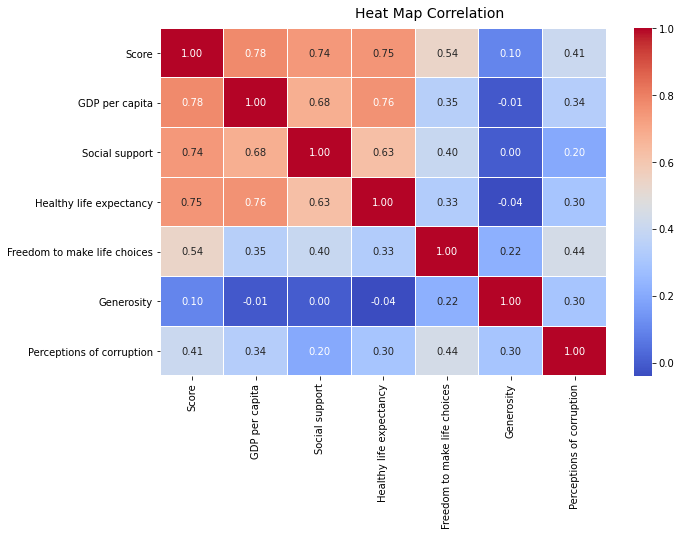

In [473]:
# Data Visualitation
import matplotlib.pyplot as plt
import seaborn as sns

f, ax = plt.subplots(figsize=(10, 6))
corr = df_result.corr()
hm = sns.heatmap(round(corr,2), 
                 annot=True, 
                 ax=ax, 
                 cmap="coolwarm",
                 fmt='.2f',
                 linewidths=.05)

f.subplots_adjust(top=0.93)
t= f.suptitle('Heat Map Correlation', fontsize=14)

In [474]:
# Normalisasi
target = np.array(df_result["Score"]).reshape(-1,1)
X = StandardScaler().fit_transform(df_result.drop(["Score"], axis=1))
X = np.nan_to_num(X)
n_inpt, inpt_size = X.shape

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.2, shuffle=False, random_state=0)      

In [475]:
# Statistic Summary Hasil Normalisasi
scaled_df = pd.DataFrame(X, columns=['GDP per capita',
                                     'Social support',
                                     'Healthy life expectancy',
                                     'Freedom to make life choices',
                                     'Generosity','Perceptions of corruption'])
scaled_df.describe()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,6.200000e+02,6.200000e+02,6.200000e+02,6.200000e+02,6.200000e+02,6.200000e+02
mean,1.210501e-16,6.073994e-16,2.929556e-16,2.729783e-16,-7.395518e-17,9.741312e-17
std,1.000807e+00,1.000807e+00,1.000807e+00,1.000807e+00,1.000807e+00,1.000000e+00
min,-2.293651e+00,-3.048734e+00,-2.570290e+00,-2.855144e+00,-1.739233e+00,-1.179055e+00
25%,-7.641897e-01,-5.466353e-01,-6.804911e-01,-6.656619e-01,-7.516185e-01,-6.541193e-01
50%,1.575833e-01,1.657504e-01,1.468908e-01,1.184195e-01,-1.200605e-01,-3.054621e-01
75%,7.834325e-01,8.304714e-01,7.358839e-01,7.932303e-01,5.379385e-01,2.651481e-01
max,3.014712e+00,1.599783e+00,1.988477e+00,1.969826e+00,5.774648e+00,4.086861e+00


In [476]:
#Callback
import time

class TimeHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, batch, logs={}):
        self.epoch_time_start = time.time()

    def on_epoch_end(self, batch, logs={}):
        self.times.append(time.time() - self.epoch_time_start) 

from keras.callbacks import EarlyStopping
earlystop = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0.001,
                          patience = 100,
                          verbose = 1,
                          restore_best_weights = True)

In [491]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure(figsize=(10,5))
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [Score]')
  plt.plot(hist['epoch'], hist['mean_squared_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_squared_error'],
           label = 'Val Error')
  plt.legend()

  plt.figure(figsize=(10,5))  
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [Score]')
  plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Val Error')
  plt.legend()

In [477]:
def build_model(frame_size): #membangun model dengan 64 neuron pada hidden layer menggunakan fungsi aktivasi relu
  model = keras.Sequential([
    layers.Dense(20, activation=tf.nn.tanh, input_dim=frame_size),
    layers.Dense(1)
  ]) 
  
  #Menentukan optimizer yang akan digunakan
  #optimizer = keras.optimizers.SGD(lr=0.0001, momentum=0.9, nesterov=True)
  #adam_opt = keras.optimizers.Adam(learning_rate=0.0001, 
  #                                 beta_1=0.9, 
  #                                 beta_2=0.999,
  #                                 epsilon=1e-07,
  #                                 amsgrad=False,
  #                                 name="Adam")

  #Menentukan loss function dan menghitung error
  model.compile(loss='mean_squared_error',
                metrics=['mean_absolute_error', 'mean_squared_error'])
  return model

In [478]:
# Training Model
EPOCHS = 500

model = build_model(inpt_size)
time_callback = TimeHistory()

history = model.fit(
    X_train, y_train,
    epochs=EPOCHS, validation_split = 0.2, verbose=0,
    callbacks=[earlystop, time_callback])

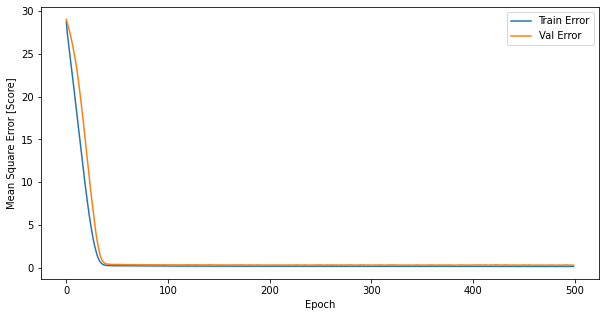

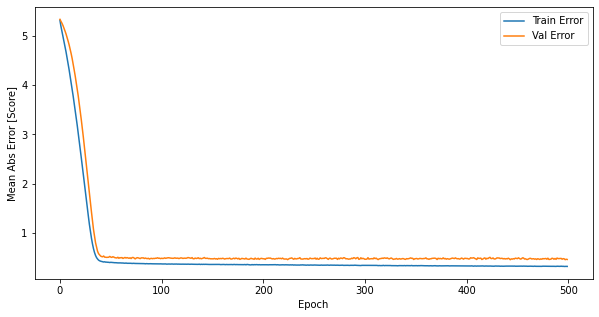

In [492]:
# Plot Training-Validation
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

plt.show()
plot_history(history)

In [493]:
#Validasi Kinerja Model
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits=10, shuffle=True, random_state=0)
cvscores = []
EPOCHS = 500

for train_index, test_index in kfold.split(X):
    Xtrain, Xtest = X[train_index], X[test_index]
    Ytrain, Ytest = Y[train_index], Y[test_index]
    
    model = build_model(inpt_size)
    time_callback = TimeHistory()

    history = model.fit(
        X_train, y_train,
        epochs=EPOCHS, validation_split = 0.2, verbose=0,
        callbacks=[time_callback])

    loss, mae, mse = model.evaluate(X_test, y_test, verbose=0)
    print("MAE: %.6f" % (mae))
    print("MSE: %.6f" % (mae))
    
    cvscores.append([mae,mse])

NameError: ignored

In [494]:
# Test Model 
loss, mae, mse = model.evaluate(X_test, y_test, verbose=0)
y_predictions = model.predict(X_test)

# Hasil Prediksi
hasil = list([y_test, y_predictions])
df_hasil = pd.DataFrame()
df_hasil['Aktual'] = [i for i in hasil[0]]
df_hasil['Prediksi'] = hasil[1]
print(df_hasil.head(6))

# Metric
print('\n')
print('Evaluasi Prediksi Model: ')
print("Testing set Mean Abs Error: {:5.5f}".format(mae))
print("Testing set Mean Squared Error: {:5.5f}".format(mse))

                 Aktual  Prediksi
0   [6.387400150299072]  6.128870
1   [6.377099990844727]  6.302592
2  [6.3755998611450195]  6.208444
3   [6.363399982452393]  6.267387
4   [6.348299980163574]  5.644363
5   [6.325200080871582]  5.360199


Evaluasi Prediksi Model: 
Testing set Mean Abs Error: 0.40643
Testing set Mean Squared Error: 0.27363


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd94c7f0e48>]],
      dtype=object)

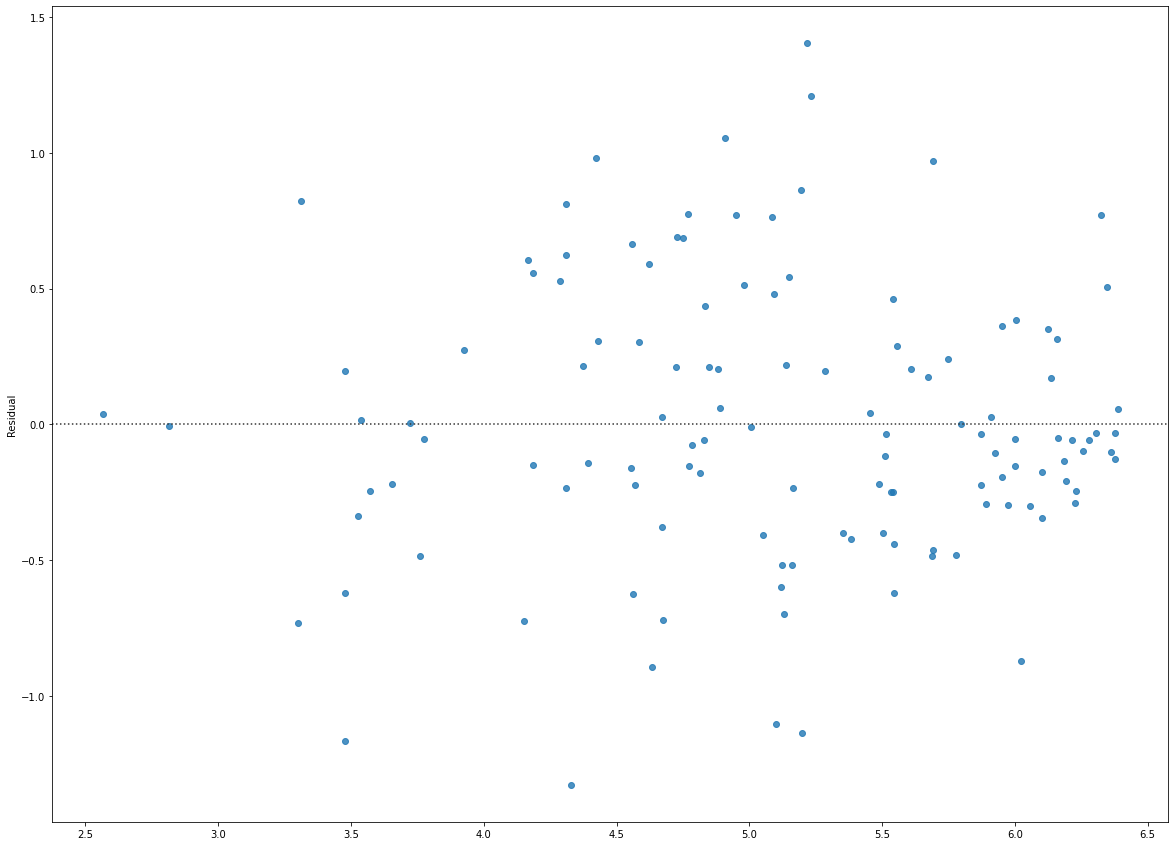

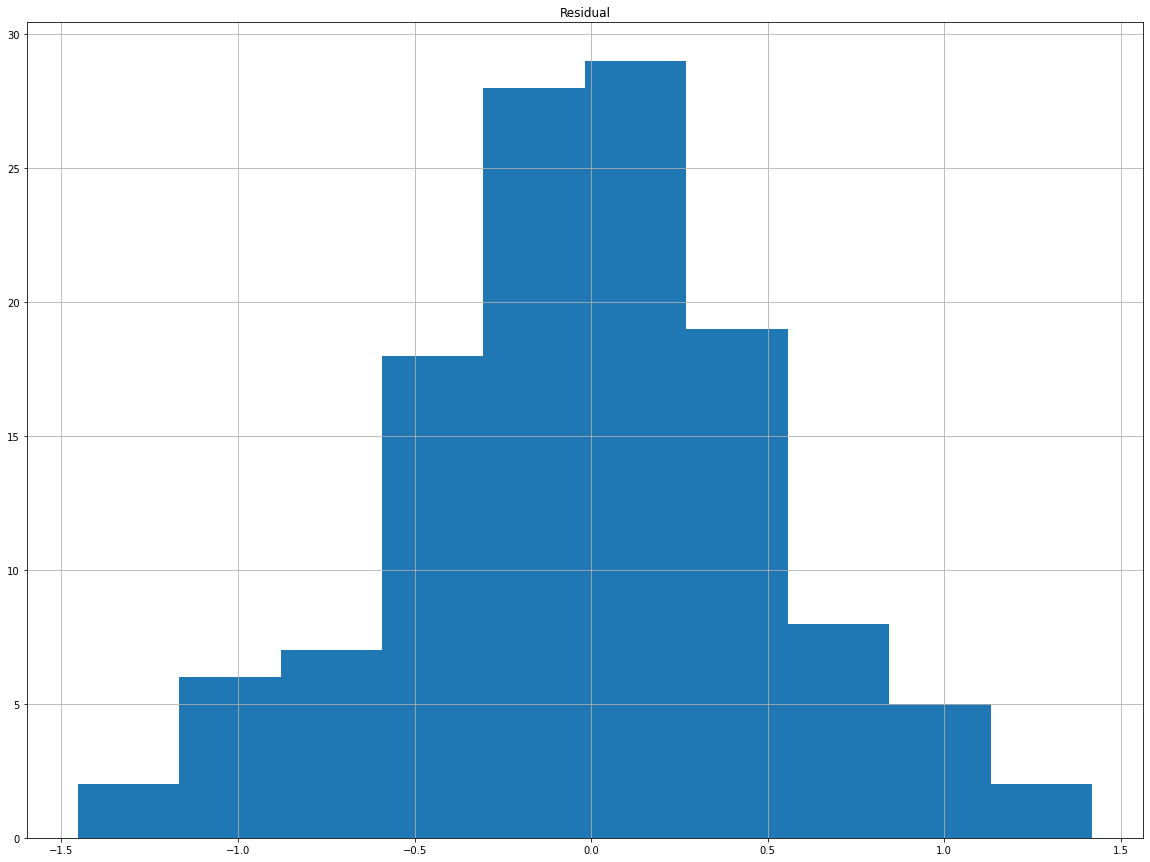

In [487]:
# Visualisasi Hasil

##Analisis Residual
residual = y_test - y_predictions.reshape(-1,1)
residual2 = pd.DataFrame(residual, columns=['Residual'])
##Residual Plot
sns.residplot(y_test, residual2['Residual'])
##Residual Histogram
residual2.hist()

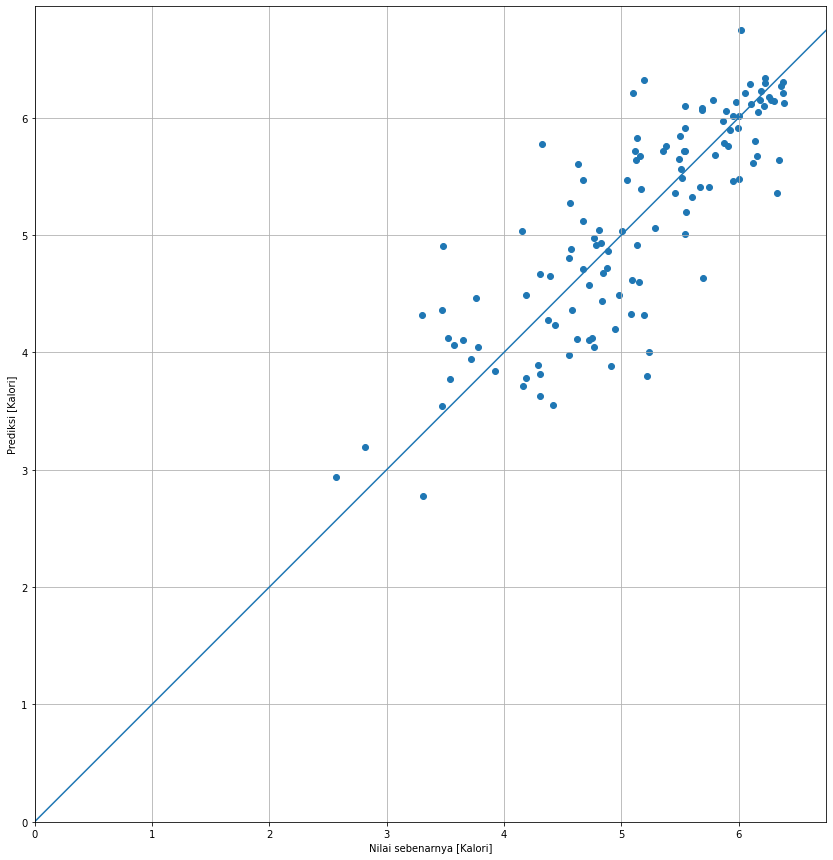

In [495]:
##Residual vs Actual Plot
plt.scatter(y_test, y_predictions)
plt.xlabel('Nilai sebenarnya [Kalori]')
plt.ylabel('Prediksi [Kalori]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
plt.grid(True)
_ = plt.plot([-100, 1000], [-100, 1000])